# **Task 1: Data preparation and customer analysis**

*(1) `Data requirements specifications`*

*(2) `Data collections`*

*(3) `Data preparations`*

*(4) `Data exploratory`*

*(5) `Modeling & Evaluation`*

*(6) `Communication of insights`*

## **1. Data requirements specifications**
Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.

- Examine `transaction` data
- Examine `customer` data
- Data analysis and customer segments: metrics, create charts and graphs, notes,...
- Deep dive into customer segments

## **2. Data collections**

In [1]:
#import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime as dt

plt.style.use('ggplot')

In [2]:
#import data
customers = pd.read_csv(r'C:\Users\user\OneDrive\Máy tính\Personal Project\Quantium\Task 1 - Data preparation and customer analytics\QVI_purchase_behaviour.csv')
transactions = pd.read_excel(r'C:\Users\user\OneDrive\Máy tính\Personal Project\Quantium\Task 1 - Data preparation and customer analytics\QVI_transaction_data.xlsx')

## **3. Data preparations**

## **- transaction dataset**

### - Understanding the big picture

**Columns description**

There are 264.836 rows and 8 columns in dataset *`transaction`*
- `DATE`: dtype: datetime - context: date of transactions
- `STORE_NBR`: dtype: int - context: store's number or ID of the store
- `LYLTY_CARD_NBR`: dtype: int - context: loyalty_card's number or ID of customer
- `TXN_ID`: dtype: int - context: ID of transaction
- `PROD_NBR`: dtype: int - context: product's number or ID of product
- `PROD_NAME`: dtype: str - context: name of product
- `PROD_QTY`: dtype: int - context: quantity of product in transaction
- `TOT_SALES`: dtype: float - context: total sales of transaction

In [3]:
#examine transactions data
transactions.head()

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR   
0  43390          1            1000       1         5  \
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8

In [4]:
transactions.shape

(264836, 8)

In [5]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [6]:
transactions.describe(include='all')

DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID   
count   264836.000000  264836.00000    2.648360e+05  2.648360e+05  \
unique            NaN           NaN             NaN           NaN   
top               NaN           NaN             NaN           NaN   
freq              NaN           NaN             NaN           NaN   
mean     43464.036260     135.08011    1.355495e+05  1.351583e+05   
std        105.389282      76.78418    8.057998e+04  7.813303e+04   
min      43282.000000       1.00000    1.000000e+03  1.000000e+00   
25%      43373.000000      70.00000    7.002100e+04  6.760150e+04   
50%      43464.000000     130.00000    1.303575e+05  1.351375e+05   
75%      43555.000000     203.00000    2.030942e+05  2.027012e+05   
max      43646.000000     272.00000    2.373711e+06  2.415841e+06   

             PROD_NBR                               PROD_NAME       PROD_QTY   
count   264836.000000                                  264836  264836.000000  \
unique            NaN                                     114            NaN   
top               NaN  Kettle Mozzarella   Basil & Pesto 175g            NaN   
freq              NaN                                    3304            NaN   
mean        56.583157                                     NaN       1.907309   
std         32.826638                                     NaN       0.643654   
min          1.000000                                     NaN       1.000000   
25%         28.000000                                     NaN       2.000000   
50%         56.000000                                     NaN       2.000000   
75%         85.000000                                     NaN       2.000000   
max        114.000000                                     NaN     200.000000   

            TOT_SALES  
count   264836.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean         7.304200  
std          3.083226  
min          1.500000  
25%          5.400000  
50%          7.400000  
75%          9.200000  
max        650.000000

### - Preparation (Clean Data)

In [7]:
# DATE column
#convert excel date to real date
transactions['DATE'] = pd.TimedeltaIndex(transactions['DATE'], unit='D') + dt.datetime(1899, 12, 30)

In [8]:
#PORD_NAME column
#extract product size
transactions['PROD_SIZE'] = [re.search(r'[0-9]+(g|G)', p).group(0).replace('G', '').replace('g', '')\
                            for p in transactions['PROD_NAME']]

In [9]:
#some of the product are not chips, most of them with the word 'Salsa'.
#However, some Salsa are actually chips with 'salsa' in their product names.
#Need to remove those that are 'salsa' and not chips

#All products contains 'Salsa' in their product names
conditions = transactions['PROD_NAME'].str.contains('Salsa|salsa')
prod_contains_salsa = transactions.loc[conditions, 'PROD_NAME'].unique()

#Remove products that are not chips
transactions = transactions[~transactions['PROD_NAME'].isin([
    'Old El Paso Salsa   Dip Tomato Mild 300g',
    'Doritos Salsa       Medium 300g',
    'Old El Paso Salsa   Dip Chnky Tom Ht300g',
    'Woolworths Mild     Salsa 300g',
    'Old El Paso Salsa   Dip Tomato Med 300g',
    'Woolworths Medium   Salsa 300g',
    'Doritos Salsa Mild  300g'
])].reset_index(drop=True)


In [10]:
#clean up 'PROD_NAME' column
#remove &,/ with white space and remove multiple spaces
transactions['PROD_NAME'] = [" ".join(p.replace('&', ' ').replace('/', ' ').split()) for p in transactions['PROD_NAME']]

#remove product_size in their name
transactions['PROD_NAME'] = [re.sub(r'\s*[0-9]+(g|G)', r'', p) for p in transactions['PROD_NAME']]

In [11]:
def replaceWords(string):
    string = re.sub(r'SeaSalt', 'Sea Salt', string)
    string = re.sub(r'ChpsHny', 'Chips Honey', string)
    string = re.sub(r'Jlpno Chili', 'Jalapeno Chilli', string)
    string = re.sub(r'Swt Chlli Sr Cream', 'Sweet Chilli Sour Cream', string)
    string = re.sub(r'Swt Pot', 'Sweet Potato', string)
    string = re.sub(r'Crnkle', 'Crinkle', string)
    string = re.sub(r'Orgnl', 'Original', string)
    string = re.sub(r'Chp', 'Chips', string)
    string = re.sub(r'Spcy', 'Spicy', string)
    string = re.sub(r'Chip', 'Chips', string)
    string = re.sub(r'SourCream', 'Sour Cream', string)
    string = re.sub(r'Crm', 'Cream', string)
    string = re.sub(r'ChpsBtroot', 'Chips Beetroot', string)
    string = re.sub(r'ChpsFeta', 'Chips Feta', string)
    string = re.sub(r'Strws', 'Straw', string)
    string = re.sub(r'Seasonedchicken', 'Seasoned Chicken', string)
    string = re.sub(r'Slt', 'Salt', string)
    string = re.sub(r'Sthrn', 'Southern', string)
    string = re.sub(r'Vingar', 'Vinegar', string)
    string = re.sub(r'Whlgrn Crisps Cheddr Mstrd', 'Wholegrain Crisps Cheddar Mustard', string)
    string = re.sub(r'Tmato Hrb Spce', 'Tomato Herbs and Spices', string)
    string = re.sub(r'Rst', 'Roast', string)
    string = re.sub(r'Chs', 'Cheese', string)
    string = re.sub(r'Btroot', 'Beetroot', string)
    string = re.sub(r'Chckn', 'Chicken', string)
    string = re.sub(r'Mzzrlla', 'Mozzarella', string)
    string = re.sub(r'saltd', 'Salted', string)
    string = re.sub(r'CutSalt', 'Cut Salt', string)
    string = re.sub(r'Chikn', 'Chicken', string)
    string = re.sub(r'Whlegrn', 'Wholegrain', string)
    string = re.sub(r'Frch Onin', 'French Onion', string)
    string = re.sub(r'Hony', 'Honey', string)
    string = re.sub(r'ChipsssBeetroot', 'Chips Beetroot', string)
    string = re.sub(r'S Cream', 'Sour Cream', string)
    string = re.sub(r'ChipsssFeta', 'Chips Feta', string)
    return string

transactions['PROD_NAME'] = transactions['PROD_NAME'].apply(replaceWords)

transactions['PROD_NAME'].replace('Infzns Crn Crnchers Tangy Gcamole', 'Infuzions Corn Crunchers Tangy Guacamole', 
                                  inplace=True)

In [12]:
#extract PROD_BRAND

#list of product_brand
prod_brands = ['Smiths', 'Red Rock Deli', 'Kettle', 'Doritos', 'Pringles', 'Thins',
               'Twisties', 'Grain Waves', 'Cheezels', 'Cobs' ,'Tyrrells', 'Infuzions',
               'Sunbites', 'Woolworth', 'Natural Chip Co', 'French Fries', 'Burger Rings', 'CCs',
               'Cheetos', 'Tostitos']

#create filter
smiths = "Smiths|Smith"
red_rock_deli = "RRD|Red Rock Deli"
kettle = "Kettle"
doritos = "Doritos|Dorito"
pringles = "Pringles"
thins = "Thins"
twisties = "Twisties"
grain_waves = "Grain Waves|GrnWves"
cheezels = "Cheezels"
cobs = "Cobs" 
tyrrels = "Tyrrells"
infuzions = "Infuzions"
sunbites = "Sunbites|Snbts"
woolworth = "Woolworths|WW|Woolworth"
natural_chips_co = "Natural Chips Co|Natural ChipsCo|NCC|Natural Chips Compny"
french_fries = "French Fries"
burger_rings = "Burger Rings"
ccs = "CCs"
cheetos = "Cheetos"
tostitos= "Tostitos"

#create a list contains filters
conditions = [
    (transactions['PROD_NAME'].str.contains(smiths)),
    (transactions['PROD_NAME'].str.contains(red_rock_deli)),
    (transactions['PROD_NAME'].str.contains(kettle)),
    (transactions['PROD_NAME'].str.contains(doritos)),
    (transactions['PROD_NAME'].str.contains(pringles)),
    (transactions['PROD_NAME'].str.contains(thins)),
    (transactions['PROD_NAME'].str.contains(twisties)),
    (transactions['PROD_NAME'].str.contains(grain_waves)),
    (transactions['PROD_NAME'].str.contains(cheezels)),
    (transactions['PROD_NAME'].str.contains(cobs)),
    (transactions['PROD_NAME'].str.contains(tyrrels)),
    (transactions['PROD_NAME'].str.contains(infuzions)),
    (transactions['PROD_NAME'].str.contains(sunbites)),
    (transactions['PROD_NAME'].str.contains(woolworth)),
    (transactions['PROD_NAME'].str.contains(natural_chips_co)),
    (transactions['PROD_NAME'].str.contains(french_fries)),
    (transactions['PROD_NAME'].str.contains(burger_rings)),
    (transactions['PROD_NAME'].str.contains(ccs)),
    (transactions['PROD_NAME'].str.contains(cheetos)),
    (transactions['PROD_NAME'].str.contains(tostitos))
]

#create prod_brand column
transactions['PROD_BRAND'] = np.select(conditions, prod_brands, default='Orther')

In [13]:
#extract prod_flavour

#list of prod_flavour
prod_flavours = ['Original', 'Sea Salt & Vinegar', 'Cheese',
                 'Sweet Chilli', 'Chicken', 'BBQ', 'Sour Cream',
                 'Honey', 'Chive and Onion', 'Spicy',
                 'Light & Tangy', 'Lime & Black Pepper']

#create filters
originals = "Original|Bolognese|French Fries Potato Chipss"
seaSaltAndVinegar = "Salt|Sea Salt|Salted|Vinegar"
cheese = "Cheese|Mozzarella|Camembert|Puffs|Supreme|Cheddar"
sweet_chilli = "Sweet Chilli|SweetChili|Tomato Salsa|Beetroot Chilli Jam|Tomato|Beetroot"
chicken = "Chicken"
bbq = "BBQ|Barbeque|Barbecue"
sour_cream = "Sour Cream|Sour"
honey = "Honey"
chive_onion = "Chive|Onion|Burger Rings"
spicy = "Spicy|Jalapeno|Chilli|Mexicana"
light_tangy = "Light Tangy|Tangy"
lime_pepper = "Lime|Pepper"

#create a list contains filters
conditions = [
    (transactions['PROD_NAME'].str.contains(originals)),
    (transactions['PROD_NAME'].str.contains(seaSaltAndVinegar)),
    (transactions['PROD_NAME'].str.contains(cheese)),
    (transactions['PROD_NAME'].str.contains(sweet_chilli)),
    (transactions['PROD_NAME'].str.contains(chicken)),
    (transactions['PROD_NAME'].str.contains(bbq)),
    (transactions['PROD_NAME'].str.contains(sour_cream)),
    (transactions['PROD_NAME'].str.contains(honey)),
    (transactions['PROD_NAME'].str.contains(chive_onion)),
    (transactions['PROD_NAME'].str.contains(spicy)),
    (transactions['PROD_NAME'].str.contains(light_tangy)),
    (transactions['PROD_NAME'].str.contains(lime_pepper))
]

#create prod_brand column
transactions['PROD_FLAVOUR'] = np.select(conditions, prod_flavours, default='Orther')

In [14]:
transactions.head()

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR   
0 2018-10-17          1            1000       1         5  \
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                      PROD_NAME  PROD_QTY  TOT_SALES   
0                 Natural Chips Compny Sea Salt         2        6.0  \
1                              CCs Nacho Cheese         3        6.3   
2             Smiths Crinkle Cut Chipss Chicken         2        2.9   
3          Smiths Chips Thinly Sour Cream Onion         5       15.0   
4  Kettle Tortilla Chipss Honey Jalapeno Chilli         3       13.8   

  PROD_SIZE       PROD_BRAND        PROD_FLAVOUR  
0       175  Natural Chip Co  Sea Salt & Vinegar  
1       175              CCs              Cheese  
2       170           Smiths             Chicken  
3       175           Smiths          Sour Cream  
4       150           Kettle               Honey

<Axes: xlabel='TOT_SALES'>

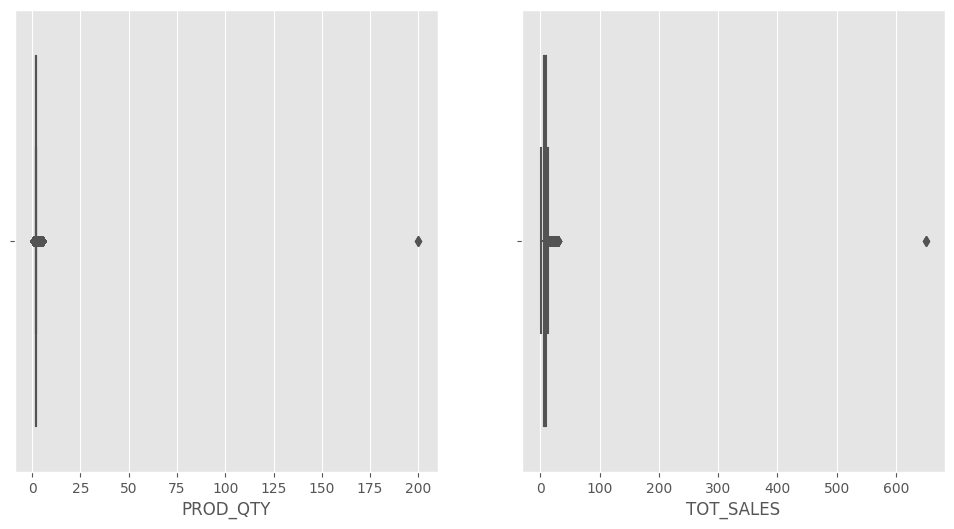

In [15]:
#checking outlier
fig, ax = plt.subplots(1, 2, figsize=(12,6))

sns.boxplot(data=transactions, x='PROD_QTY', ax=ax[0])
sns.boxplot(data=transactions, x='TOT_SALES', ax=ax[1])

In [16]:
transactions.query("PROD_QTY == 200")

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR   
65786 2018-08-19        226          226000  226201         4  \
65787 2019-05-20        226          226000  226210         4   

                        PROD_NAME  PROD_QTY  TOT_SALES PROD_SIZE PROD_BRAND   
65786  Dorito Corn Chipss Supreme       200      650.0       380    Doritos  \
65787  Dorito Corn Chipss Supreme       200      650.0       380    Doritos   

      PROD_FLAVOUR  
65786       Cheese  
65787       Cheese

In [17]:
#remove outliers - drop rows using label
transactions.drop([65786, 65787], inplace=True)

In [18]:
#checking duplicated row
transactions.duplicated().sum()

1

In [19]:
#remove duplicated row
transactions.drop_duplicates(inplace=True)

In [20]:
#check missing values
transactions.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
PROD_SIZE         0
PROD_BRAND        0
PROD_FLAVOUR      0
dtype: int64

In [21]:
#sorting transactions df in ascending order of the DATE column
transactions = transactions.sort_values(by='DATE')
transactions = transactions.reset_index(drop=True)
transactions

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR   
0      2018-07-01        169          169087  171127        91  \
1      2018-07-01        208          208032  206285        42   
2      2018-07-01         75           75293   74597        88   
3      2018-07-01        148          148014  147248       108   
4      2018-07-01          4            4134    3265        71   
...           ...        ...             ...     ...       ...   
249662 2019-06-30         78           78036   75679       104   
249663 2019-06-30        208          208156  207010        46   
249664 2019-06-30        242          242061  246061        24   
249665 2019-06-30        225          225087  225187        98   
249666 2019-06-30        144          144041  144115        78   

                                           PROD_NAME  PROD_QTY  TOT_SALES   
0                                   CCs Tasty Cheese         2        4.2  \
1                Doritos Corn Chips Mexican Jalapeno         2        7.8   
2                           Kettle Honey Soy Chicken         2       10.8   
3       Kettle Tortilla Chipss Honey Jalapeno Chilli         1        4.6   
4                             Twisties Cheese Burger         2        8.6   
...                                              ...       ...        ...   
249662           Infuzions Thai SweetChili PotatoMix         2        7.6   
249663                               Kettle Original         2       10.8   
249664                      Grain Waves Sweet Chilli         2        7.2   
249665                  NCC Sour Cream Garden Chives         2        6.0   
249666                     Thins Chipss Salt Vinegar         2        6.6   

       PROD_SIZE       PROD_BRAND        PROD_FLAVOUR  
0            175              CCs              Cheese  
1            150          Doritos               Spicy  
2            175           Kettle             Chicken  
3            150           Kettle               Honey  
4            250         Twisties              Cheese  
...          ...              ...                 ...  
249662       110        Infuzions        Sweet Chilli  
249663       175           Kettle            Original  
249664       210      Grain Waves        Sweet Chilli  
249665       175  Natural Chip Co          Sour Cream  
249666       175            Thins  Sea Salt & Vinegar  

[249667 rows x 11 columns]

In [22]:
#Now that we have the pandas.DataFrame sorted according to the date,
#we can analyse the dataset with regards to the change over time.
#However, before we can do that, we need to make sure that the DATE column contains no missing values for unrecorded dates.

#checking for any missing date in the DATE column
pd.date_range(start="2018-07-01", end="2019-06-30").difference(transactions['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [23]:
#adding value for missing date in transaction
add = [pd.to_datetime("2018-12-25"), 0, 0, 0, 0, 'None', 0, 0 , 0, 'None', 'None']
transactions.loc[len(transactions.index)] = add
transactions.tail()

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR   
249663 2019-06-30        208          208156  207010        46  \
249664 2019-06-30        242          242061  246061        24   
249665 2019-06-30        225          225087  225187        98   
249666 2019-06-30        144          144041  144115        78   
249667 2018-12-25          0               0       0         0   

                           PROD_NAME  PROD_QTY  TOT_SALES PROD_SIZE   
249663               Kettle Original         2       10.8       175  \
249664      Grain Waves Sweet Chilli         2        7.2       210   
249665  NCC Sour Cream Garden Chives         2        6.0       175   
249666     Thins Chipss Salt Vinegar         2        6.6       175   
249667                          None         0        0.0         0   

             PROD_BRAND        PROD_FLAVOUR  
249663           Kettle            Original  
249664      Grain Waves        Sweet Chilli  
249665  Natural Chip Co          Sour Cream  
249666            Thins  Sea Salt & Vinegar  
249667             None                None

In [24]:
#sorting transactions df in ascending order of the DATE column
transactions = transactions.sort_values(by='DATE')
transactions = transactions.reset_index(drop=True)
transactions

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR   
0      2018-07-01        169          169087  171127        91  \
1      2018-07-01          7            7139    6843        75   
2      2018-07-01         70           70153   68377        43   
3      2018-07-01         64           64179   61382        68   
4      2018-07-01         10           10089    9563       102   
...           ...        ...             ...     ...       ...   
249663 2019-06-30        172          172165  173767        72   
249664 2019-06-30         28           28137   25342        34   
249665 2019-06-30        114          114092  117458        25   
249666 2019-06-30         13           13200   12377        40   
249667 2019-06-30        158          158374  160080        96   

                            PROD_NAME  PROD_QTY  TOT_SALES PROD_SIZE   
0                    CCs Tasty Cheese         2        4.2       175  \
1           Cobs Popd Sea Salt Chipss         1        3.8       110   
2         Smith Crinkle Cut Bolognese         2        5.2       150   
3         Pringles Chicken Salt Crips         2        7.4       134   
4       Kettle Mozzarella Basil Pesto         2       10.8       175   
...                               ...       ...        ...       ...   
249663        WW Crinkle Cut Original         2        3.4       175   
249664          Pringles Salt Vinegar         2        7.4       134   
249665      Pringles Sour Cream Onion         2        7.4       134   
249666  Thins Chipss Seasoned Chicken         2        6.6       175   
249667     WW Original Stacked Chipss         1        1.9       160   

       PROD_BRAND        PROD_FLAVOUR  
0             CCs              Cheese  
1            Cobs  Sea Salt & Vinegar  
2          Smiths            Original  
3        Pringles  Sea Salt & Vinegar  
4          Kettle              Cheese  
...           ...                 ...  
249663  Woolworth            Original  
249664   Pringles  Sea Salt & Vinegar  
249665   Pringles          Sour Cream  
249666      Thins             Chicken  
249667  Woolworth            Original  

[249668 rows x 11 columns]

### - Study of ralationship between variables

*Univariate Analysis - Categorical Variabels*

In [25]:
#STORE_NBR column
store_nbr = transactions['STORE_NBR'].value_counts(dropna=False).reset_index()
store_nbr

STORE_NBR  count
0          226   1916
1           88   1786
2          165   1741
3           93   1722
4          237   1714
..         ...    ...
267         31      2
268         11      2
269         76      1
270          0      1
271         92      1

[272 rows x 2 columns]

In [26]:
#prod_nbr column
prod_nbr = transactions['PROD_NAME'].value_counts().reset_index()
prod_nbr

PROD_NAME  count
0                   Kettle Mozzarella Basil Pesto   3304
1    Kettle Tortilla Chipss Honey Jalapeno Chilli   3296
2        Cobs Popd Sweet Chilli Sour Cream Chipss   3269
3                     Tyrrells Crisps Ched Chives   3268
4                       Cobs Popd Sea Salt Chipss   3265
..                                            ...    ...
103                               RRD Pc Sea Salt   1431
104                  NCC Sour Cream Garden Chives   1419
105                    French Fries Potato Chipss   1418
106                       WW Crinkle Cut Original   1410
107                                          None      1

[108 rows x 2 columns]

In [27]:
#prod_qty column
prod_qty = transactions['PROD_QTY'].value_counts(normalize=True).reset_index()
prod_qty

PROD_QTY  proportion
0         2    0.891652
1         1    0.103513
2         5    0.001678
3         3    0.001650
4         4    0.001502
5         0    0.000004

In [28]:
transactions['PROD_SIZE'].value_counts().reset_index()

PROD_SIZE  count
0        175  66389
1        150  43131
2        134  25102
3        110  22387
4        170  19983
5        165  15297
6        330  12540
7        380   6416
8        270   6285
9        210   6272
10       200   4473
11       135   3257
12       250   3169
13        90   3008
14       190   2995
15       160   2970
16       220   1564
17        70   1507
18       180   1468
19       125   1454
20         0      1

In [29]:
transactions['PROD_BRAND'].value_counts().reset_index()

PROD_BRAND  count
0            Kettle  41288
1            Smiths  31822
2           Doritos  25224
3          Pringles  25102
4     Red Rock Deli  17779
5         Infuzions  14201
6             Thins  14075
7         Woolworth  11836
8              Cobs   9693
9          Tostitos   9471
10         Twisties   9454
11      Grain Waves   7740
12  Natural Chip Co   7469
13         Tyrrells   6442
14         Cheezels   4603
15              CCs   4551
16         Sunbites   3008
17          Cheetos   2927
18     Burger Rings   1564
19     French Fries   1418
20             None      1

In [30]:
transactions['PROD_FLAVOUR'].value_counts().reset_index()

PROD_FLAVOUR  count
0                Cheese  45038
1    Sea Salt & Vinegar  41668
2              Original  27662
3               Chicken  24563
4          Sweet Chilli  22050
5            Sour Cream  18396
6                 Spicy  15587
7                Orther  15388
8                   BBQ  14133
9   Lime & Black Pepper   7852
10      Chive and Onion   7702
11        Light & Tangy   6332
12                Honey   3296
13                 None      1

*Univariate Analysis - Numerical Variabels*

<Axes: xlabel='TOT_SALES', ylabel='Count'>

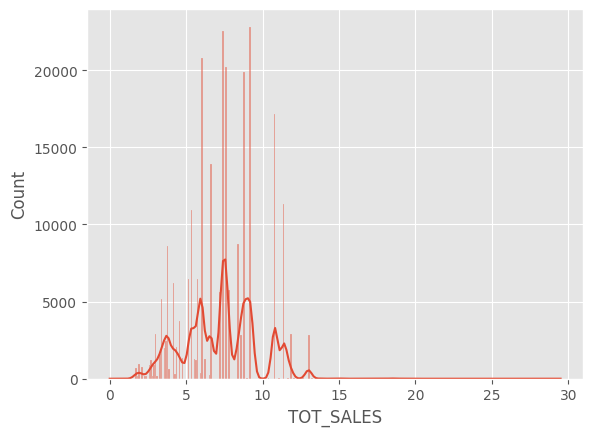

In [31]:
#tot_sales column
sns.histplot(data=transactions, x='TOT_SALES', kde=True)

*Inights after Univariate Analysis*
- Customers usually purchase Chips at stores: 226, 88, 165, 93,...
- The most purchased products are Kettle Mozzarella Basil Pesto, Kettle Tortilla Chipss Honey Jalapeno Chilli, Cobs Popd Sweet Chilli Sour Cream Chips
- Customers usually purchase 2 products in a transaction
- The most popular of product_size is 175g
- Customers' favourite chip brands are Kettle, Smiths, Doritos, Pringles
- Customers' favourite chip flavours are Cheese, Sea Salt & Vinegar and Original

*Bivariate Analysis*

In [32]:
#visualizing change in total_sales over entire record duration
date_sales = transactions.groupby('DATE', as_index=False)['TOT_SALES'].sum()
date_sales

DATE  TOT_SALES
0   2018-07-01     4962.9
1   2018-07-02     4938.1
2   2018-07-03     5005.7
3   2018-07-04     5020.9
4   2018-07-05     4698.2
..         ...        ...
360 2019-06-26     4898.3
361 2019-06-27     4967.9
362 2019-06-28     4940.4
363 2019-06-29     5201.2
364 2019-06-30     5118.8

[365 rows x 2 columns]

Text(0.5, 1.0, 'Total Sales for Entire Fiscal Year (1st July 2018 to 30th June 2019)')

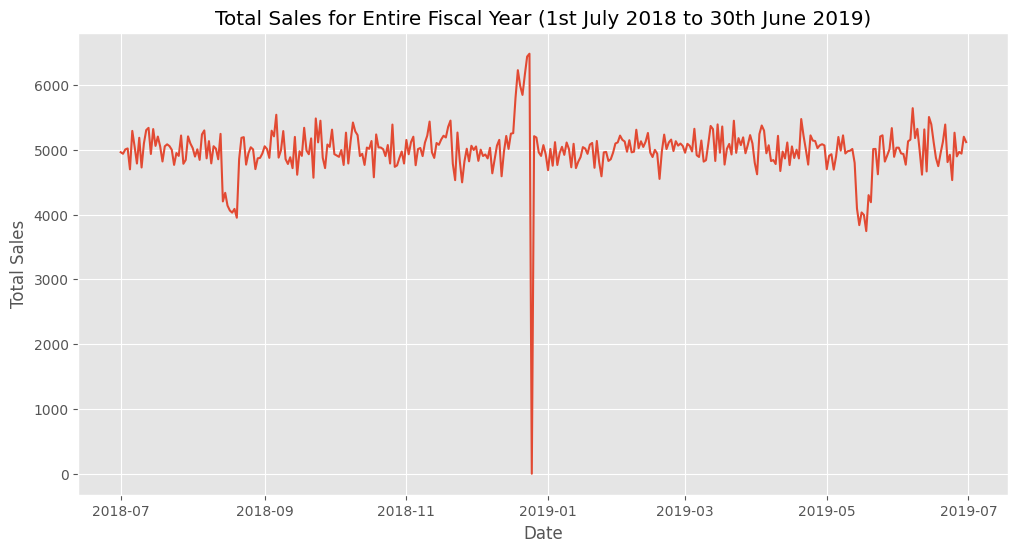

In [33]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(date_sales['DATE'], date_sales['TOT_SALES'])
ax.set_xlabel('Date')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales for Entire Fiscal Year (1st July 2018 to 30th June 2019)')

=> As we can see from the line graph, the sales drop to zero on a certain date, which is 25th December 2018 - Christmas Day, which we manually set to zero. However, the sales also reached an all-time high right before that, so we would need to analyse the transaction data for December 2018 to find out more about sales.

Text(0.5, 1.0, 'Total Sales for the Entire Month of December 2018')

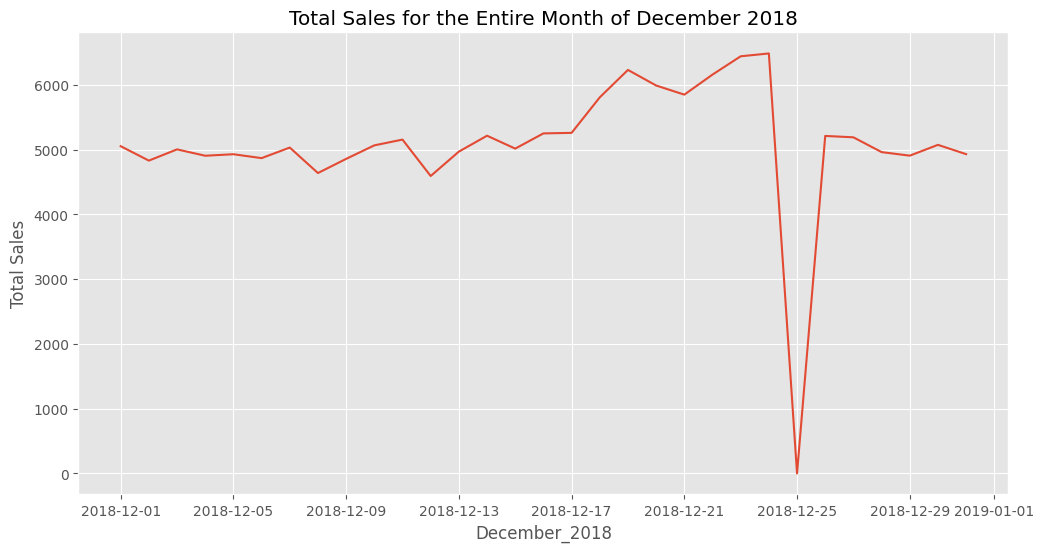

In [34]:
#plot December 2018 total_sales

#filter December 2018
december_2018 = date_sales[date_sales['DATE'].isin(pd.date_range(start='2018-12-01', end='2018-12-31').tolist())]

#visualize December 2018 total_sales 
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(december_2018['DATE'], december_2018['TOT_SALES'])
ax.set_xlabel('December_2018')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales for the Entire Month of December 2018')

=> Sales increase before Christmas Day, start form 12th December to 24th December, which make sense because people tend to purchase food items more when approaching holiday season. Therefore, in this period, stores need to prepare enough quantity to meet the needs of customers and have promotions and discounts to increase sales even more.

Text(0.5, 1.0, 'Total Sales by PROD_BRAND from 12-24 December')

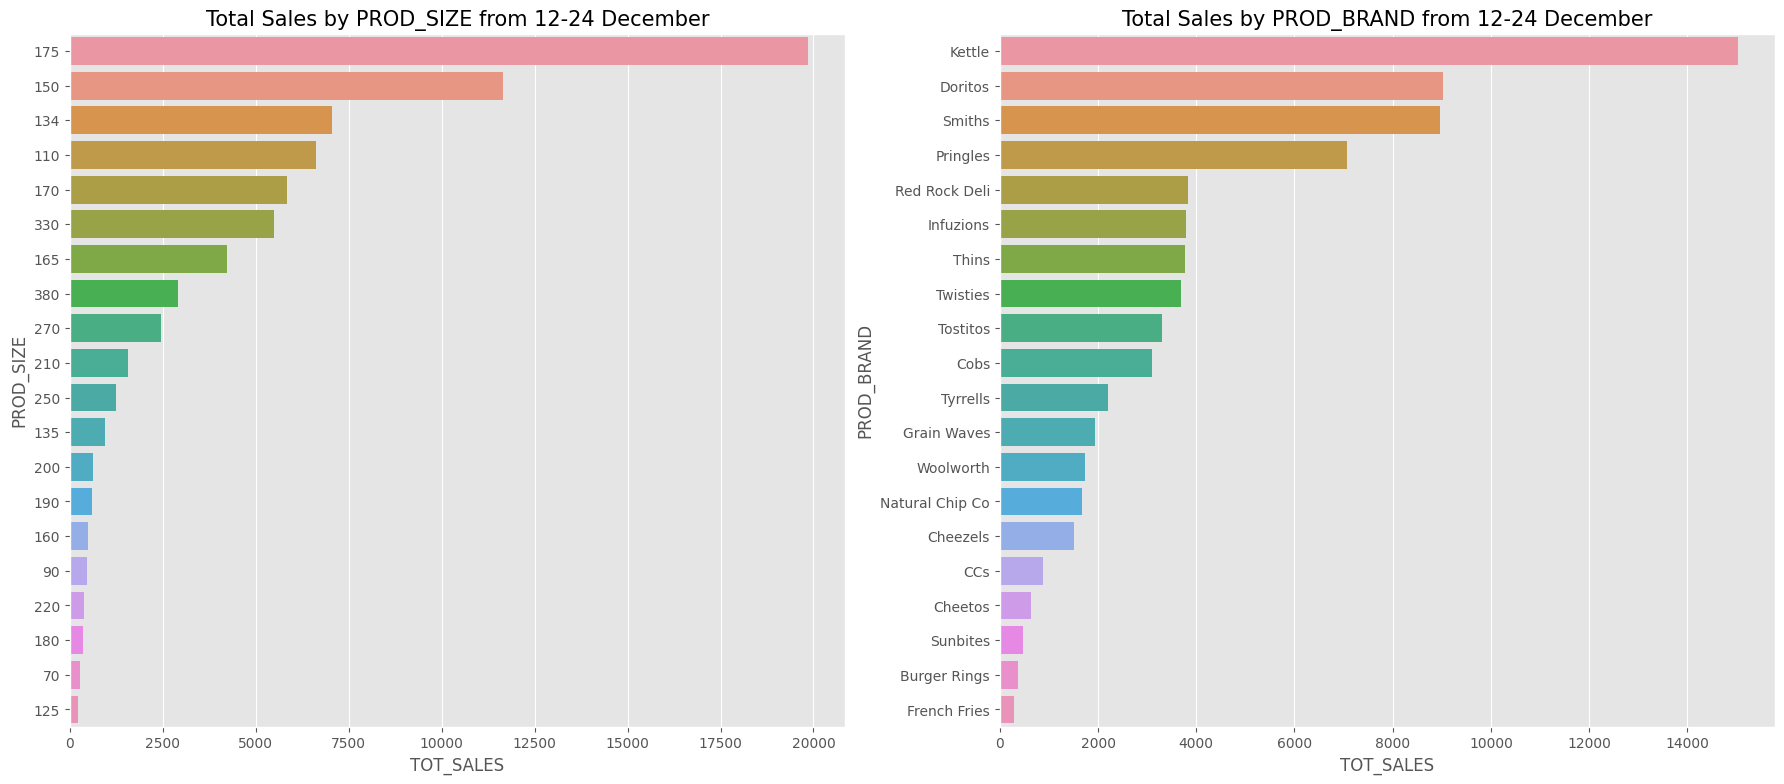

In [35]:
#extract entries transactions for period before holiday
holiday_sales = transactions[(transactions['DATE']>='2018-12-12') & (transactions['DATE']<='2018-12-24')]
size_sales = holiday_sales.groupby('PROD_SIZE')['TOT_SALES'].sum().reset_index()\
             .sort_values(by='TOT_SALES', ascending=False)

brand_size = holiday_sales.groupby('PROD_BRAND')['TOT_SALES'].sum().reset_index()\
             .sort_values(by='TOT_SALES', ascending=False)
#visualize total_sale by product_size and product_brand in holiday_sales
fig, (ax0, ax1) = plt.subplots(1, 2, sharey=False, figsize=(22,9))
sns.barplot(data=size_sales, y='PROD_SIZE', x='TOT_SALES', ax=ax0)
sns.barplot(data=brand_size, y='PROD_BRAND', x='TOT_SALES', ax=ax1)

ax0.set_title('Total Sales by PROD_SIZE from 12-24 December', fontsize=15)
ax1.set_title('Total Sales by PROD_BRAND from 12-24 December', fontsize=15)

=> During the preparation period for Christmas Day, customers bought the most products with a size of 175g.
We can see that Kettel was the highest-selling brand during holiday season, so it'd wise to surround promotions and discounts around it to drive sales even more.

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Number of transactions'),
 Text(0.5, 1.0, 'Number of transactions by Brands')]

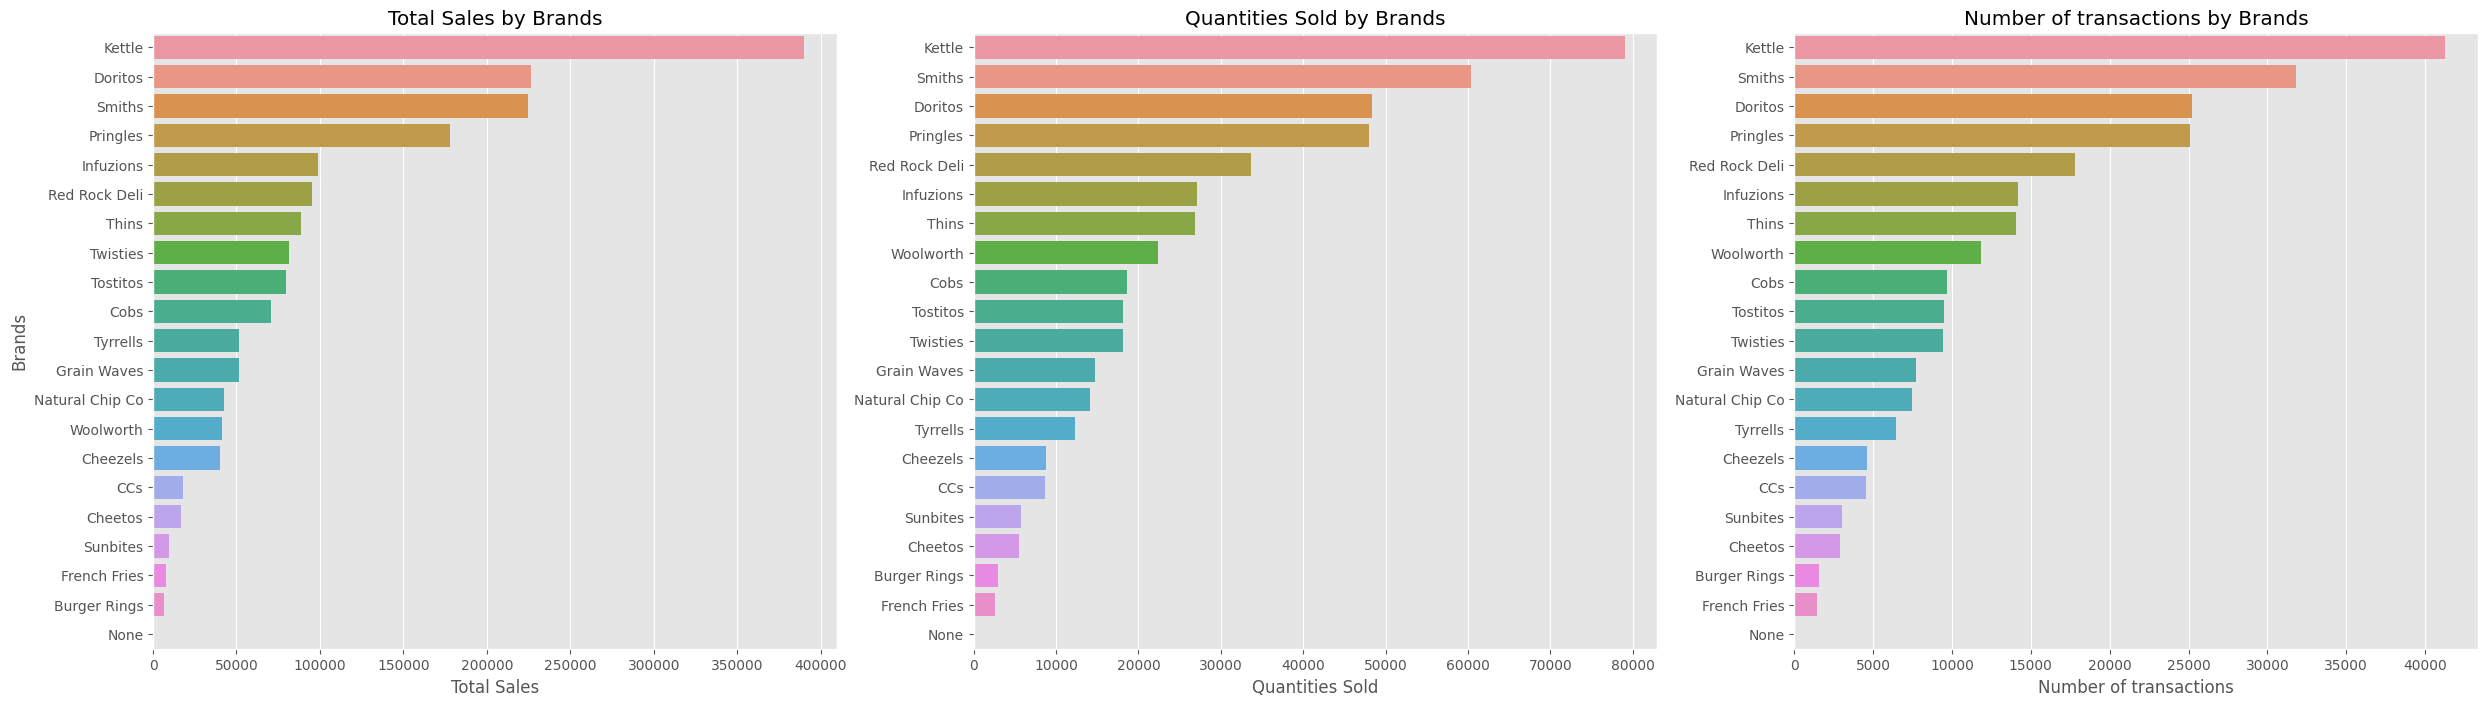

In [36]:
#Let's see if our holiday season statistics match with the ones during the entire duration of recorded transaction

#total_sale, prod_qty, number_of_transaction by brand
brands = transactions.groupby('PROD_BRAND').agg({'TOT_SALES':'sum', 'PROD_QTY':'sum', 'TXN_ID':'count'}).reset_index()
brands_total_sales = brands.sort_values('TOT_SALES', ascending=False)
brand_quantity = brands.sort_values('PROD_QTY', ascending=False)
brand_transactions = brands.sort_values('TXN_ID', ascending=False)

fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(30,8))
sns.barplot(data=brands_total_sales, x='TOT_SALES', y='PROD_BRAND', ax=ax0)
ax0.set(ylabel='Brands', xlabel='Total Sales', title='Total Sales by Brands')

sns.barplot(data=brand_quantity, x='PROD_QTY', y='PROD_BRAND', ax=ax1)
ax1.set(ylabel=None, xlabel='Quantities Sold', title='Quantities Sold by Brands')

sns.barplot(data=brand_transactions, x='TXN_ID', y='PROD_BRAND', ax=ax2)
ax2.set(ylabel=None, xlabel='Number of transactions', title='Number of transactions by Brands')

=> Kettle, Doritos, Smiths, Pringles are the brands with the highest sales, quantities sold and transactions in transactions data.
Kettel is the brand with the highest 3 factors, followed by Smiths and Doritos. French Fries and Burger Ring came in last and second last respectively.  

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Number of transactions'),
 Text(0.5, 1.0, 'Number of transactions by Product Size (g)')]

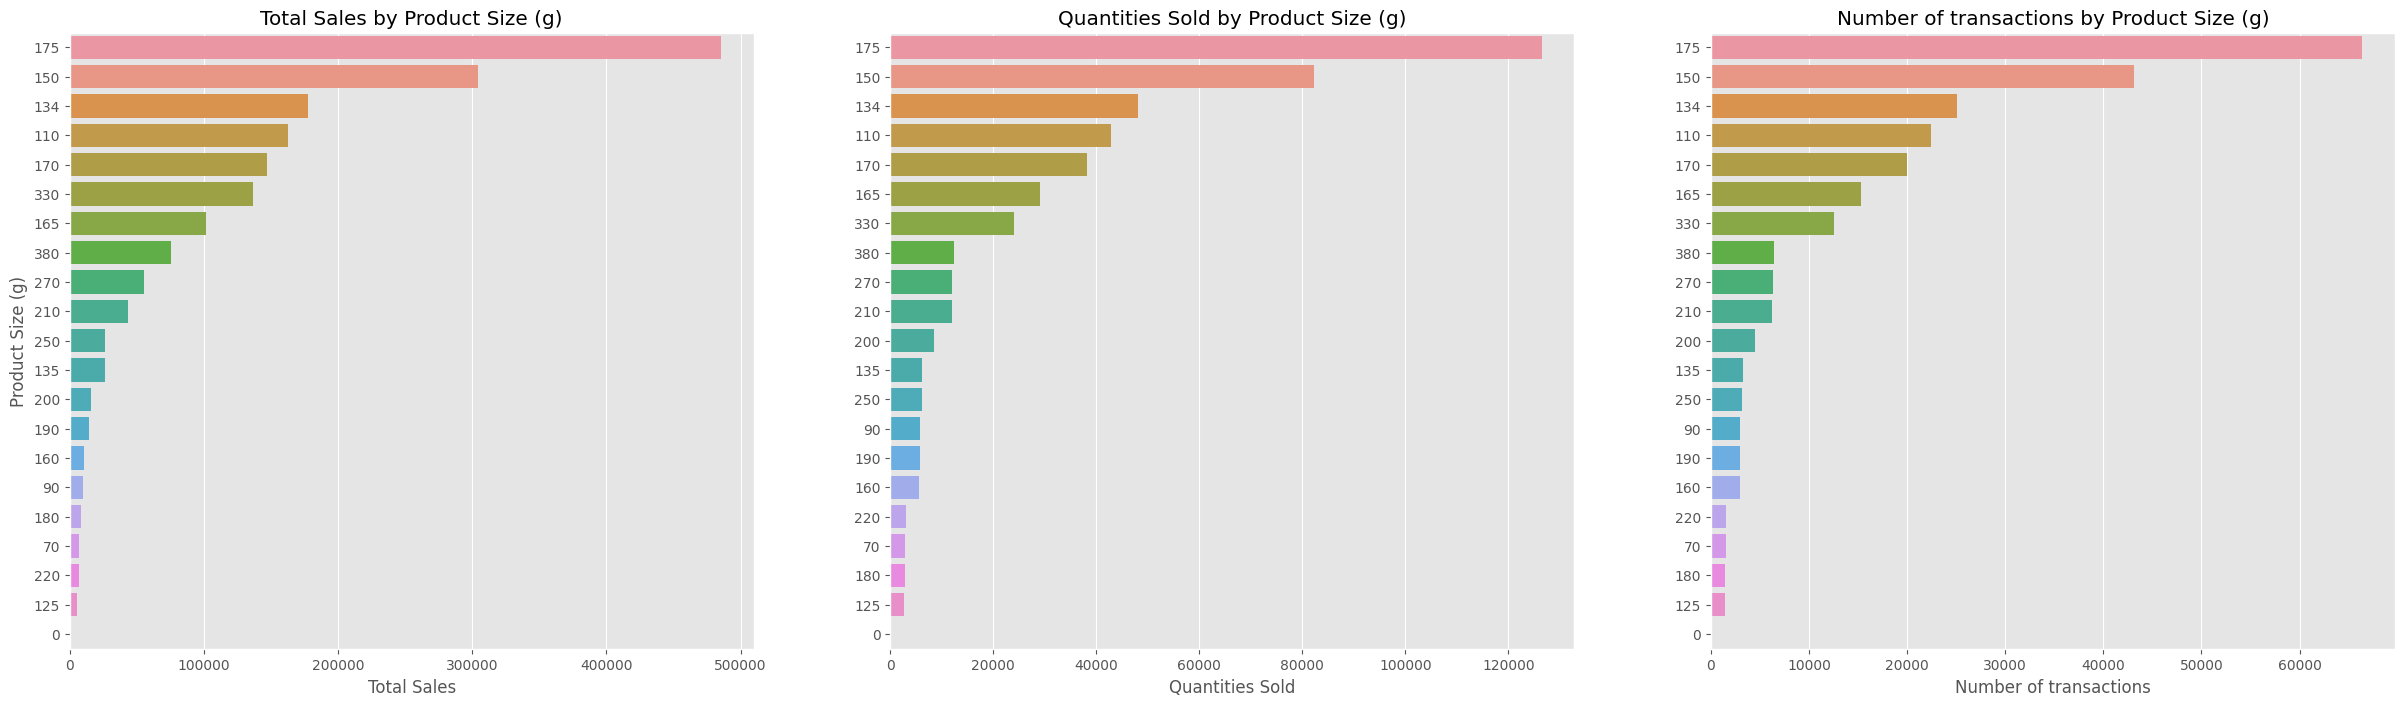

In [37]:
#total_sale, prod_qty, number_of_transaction by size
size = transactions.groupby('PROD_SIZE').agg({'TOT_SALES':'sum', 'PROD_QTY':'sum', 'TXN_ID':'count'}).reset_index()
size_total_sales = size.sort_values('TOT_SALES', ascending=False)
size_quantity = size.sort_values('PROD_QTY', ascending=False)
size_transactions = size.sort_values('TXN_ID', ascending=False)

fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(30,8))
sns.barplot(data=size_total_sales, x='TOT_SALES', y='PROD_SIZE', ax=ax0)
ax0.set(ylabel='Product Size (g)', xlabel='Total Sales', title='Total Sales by Product Size (g)')

sns.barplot(data=size_quantity, x='PROD_QTY', y='PROD_SIZE', ax=ax1)
ax1.set(ylabel=None, xlabel='Quantities Sold', title='Quantities Sold by Product Size (g)')

sns.barplot(data=size_transactions, x='TXN_ID', y='PROD_SIZE', ax=ax2)
ax2.set(ylabel=None, xlabel='Number of transactions', title='Number of transactions by Product Size (g)')

=> 175g, 150g, 134g are the product sizes with the highest sales, quantities sold and transactions in transactions data.
175g is the product size with the highest 3 factors, followed by 150g and 134g. 125g and 180g came in last and second last respectively.

In [38]:
#look at keywords and bigrams in the product name that are most popular

def count_keywords(df):
    """Function for counting product keywords in product_name"""
    words_freq = {}
    for c, p in enumerate(df['PROD_NAME']):
        for word in p.split():
            if word in words_freq.keys():
                words_freq[word] += 1
            else:
                words_freq[word] = 1
    return words_freq

from nltk.util import ngrams

def generate_ngrams(text,n):
    """function for generating ngrams"""
    words = text.split()
    return [" ".join(ngram) for ngram in list(ngrams(words,n))]

def count_bigram(df):
    """function for counting bigram in product_name"""
    bigrams_freq = {}
    for c, p in enumerate(df['PROD_NAME']):
        for ngram in generate_ngrams(p,2):
            if ngram in bigrams_freq.keys():
                bigrams_freq[ngram] += 1
            else:
                bigrams_freq[ngram] = 1
    return bigrams_freq

In [39]:
words_freq = count_keywords(transactions)
bigram_freq = count_bigram(transactions)

Text(0.5, 1.0, 'Most popular product Bigrams')

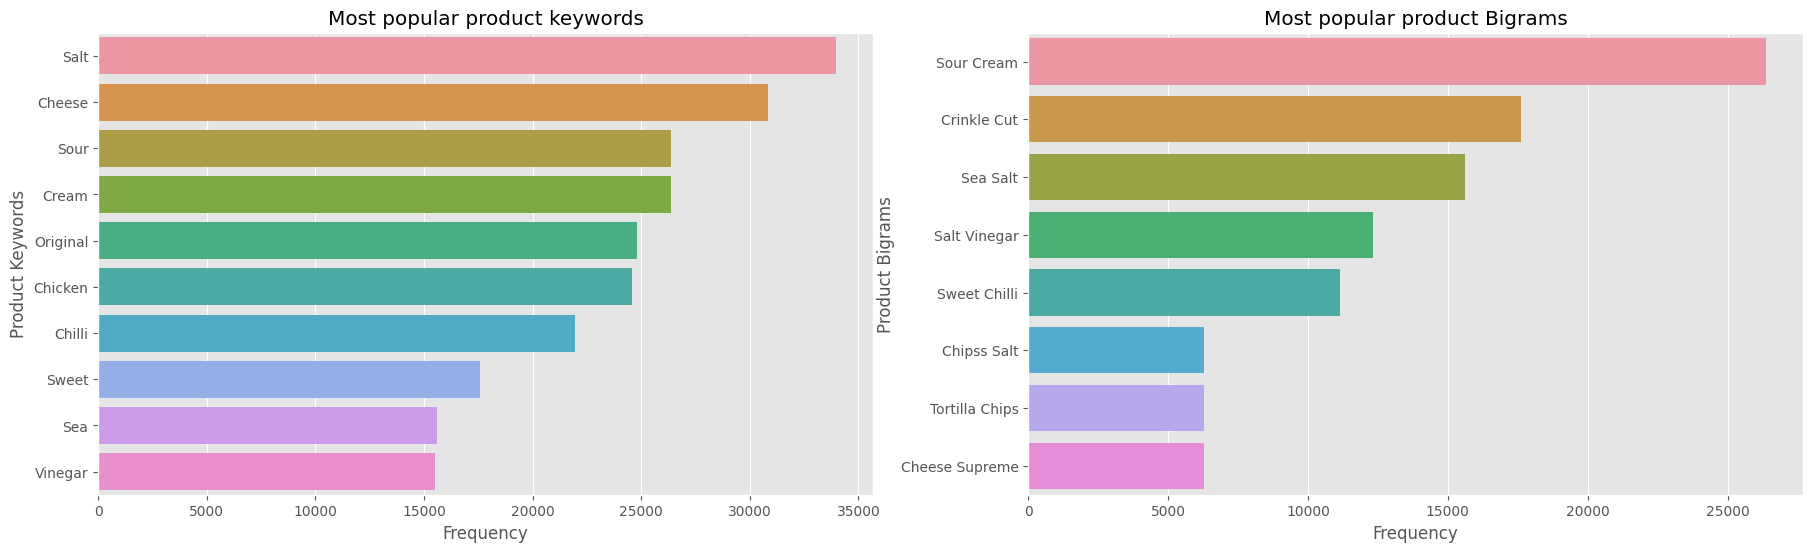

In [40]:
#get the top keywords
words_freq_df = pd.DataFrame(words_freq.items(), columns=['keyword', 'freq']).sort_values('freq', ascending=False).reset_index(drop=True)[:20]
words_freq_df = words_freq_df[~words_freq_df['keyword'].isin(['Chipss','Kettle','Smiths','Chips','Crinkle','Corn',
                                                             'Pringles','Cut','Doritos','Infuzions'])]

bigram_freq_df = pd.DataFrame(bigram_freq.items(), columns=['bigram','freq']).sort_values('freq', ascending=False).reset_index(drop=True)[:20]
bigram_freq_df = bigram_freq_df[~bigram_freq_df['bigram'].isin(['Smiths Crinkle','Doritos Corn','Corn Chipss',
                                                               'Thins Chipss','Cobs Popd','Kettle Tortilla',
                                                               'Kettle Sensations','Kettle Sweet','Tyrrells Crisps',
                                                               'Corn Chips','Twisties Cheese','Grain Waves'])]

fig, (ax0,ax1) = plt.subplots(1,2,figsize=(22,6))

sns.barplot(data=words_freq_df, x='freq',y='keyword',ax=ax0)
ax0.set_xlabel('Frequency')
ax0.set_ylabel('Product Keywords')
ax0.set_title('Most popular product keywords')

sns.barplot(data=bigram_freq_df, x='freq',y='bigram', ax=ax1)
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Product Bigrams')
ax1.set_title('Most popular product Bigrams')

=> Cheeses and Salt are the most popular in product_name keywords. When looking in bigrams, Sour Cream is the most popular. => Customers tend to buy products that taste like Cheese, Salt and Sour Cream

In [41]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249668 entries, 0 to 249667
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            249668 non-null  datetime64[ns]
 1   STORE_NBR       249668 non-null  int64         
 2   LYLTY_CARD_NBR  249668 non-null  int64         
 3   TXN_ID          249668 non-null  int64         
 4   PROD_NBR        249668 non-null  int64         
 5   PROD_NAME       249668 non-null  object        
 6   PROD_QTY        249668 non-null  int64         
 7   TOT_SALES       249668 non-null  float64       
 8   PROD_SIZE       249668 non-null  object        
 9   PROD_BRAND      249668 non-null  object        
 10  PROD_FLAVOUR    249668 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 21.0+ MB


In [42]:
#We look at the number of chips sold throughout the whole year
#we see an increase during December, possibly due to people stocking for Christmas.
#there were also dips around August and May => let's find out

#extract year month in DATE
transactions['YearMonth'] = transactions['DATE'].map(lambda date: date.year*100 + date.month)
salesYearMonth = transactions.groupby('YearMonth')['TOT_SALES'].sum().reset_index()
salesYearMonth

YearMonth  TOT_SALES
0      201807  155766.70
1      201808  148464.85
2      201809  151153.70
3      201810  154581.50
4      201811  150878.30
5      201812  157820.10
6      201901  152832.40
7      201902  141600.30
8      201903  157116.00
9      201904  150601.00
10     201905  147514.85
11     201906  151448.70

In [43]:
#visualize total_sale by yearmonth
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
pyoff.init_notebook_mode()

plot_data = [go.Scatter(x=salesYearMonth['YearMonth'],
                        y=salesYearMonth['TOT_SALES'])]

plot_layout = go.Layout(xaxis={'type':'category'},
                        title='Monthly Total_sales')

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [44]:
#monthly total_sale growth rate
salesYearMonth['MonthlyGrowth'] = salesYearMonth['TOT_SALES'].pct_change()
salesYearMonth

YearMonth  TOT_SALES  MonthlyGrowth
0      201807  155766.70            NaN
1      201808  148464.85      -0.046877
2      201809  151153.70       0.018111
3      201810  154581.50       0.022678
4      201811  150878.30      -0.023956
5      201812  157820.10       0.046009
6      201901  152832.40      -0.031604
7      201902  141600.30      -0.073493
8      201903  157116.00       0.109574
9      201904  150601.00      -0.041466
10     201905  147514.85      -0.020492
11     201906  151448.70       0.026667

In [45]:
#visualize monthly total_sale growth rate
plot_data = [go.Scatter(x=salesYearMonth['YearMonth'],
                        y=salesYearMonth['MonthlyGrowth'])]

plot_layout = go.Layout(xaxis={'type':'category'},
                        title='Monthly Growth Rate')

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [46]:
yearMonth = transactions.groupby('YearMonth').agg({'PROD_QTY':'sum', 'TXN_ID':'count'}).reset_index()
yearMonth

YearMonth  PROD_QTY  TXN_ID
0      201807     40782   21267
1      201808     38875   21086
2      201809     39415   20515
3      201810     40337   20995
4      201811     39525   20606
5      201812     41290   21495
6      201901     39986   20854
7      201902     36963   19227
8      201903     41040   21390
9      201904     39444   20522
10     201905     38715   21088
11     201906     39537   20623

In [47]:
#visualize prod_qty by yearmonth
plot_data = go.Bar(x=yearMonth['YearMonth'], y=yearMonth['PROD_QTY'])
plot_layout = go.Layout(xaxis={'type':'category'}, title='Quantities Sold by YearMonth')
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [48]:
plot_data = go.Bar(x=yearMonth['YearMonth'], y=yearMonth['TXN_ID'])
plot_layout = go.Layout(xaxis={'type':'category'}, title='Transactions by YearMonth')
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

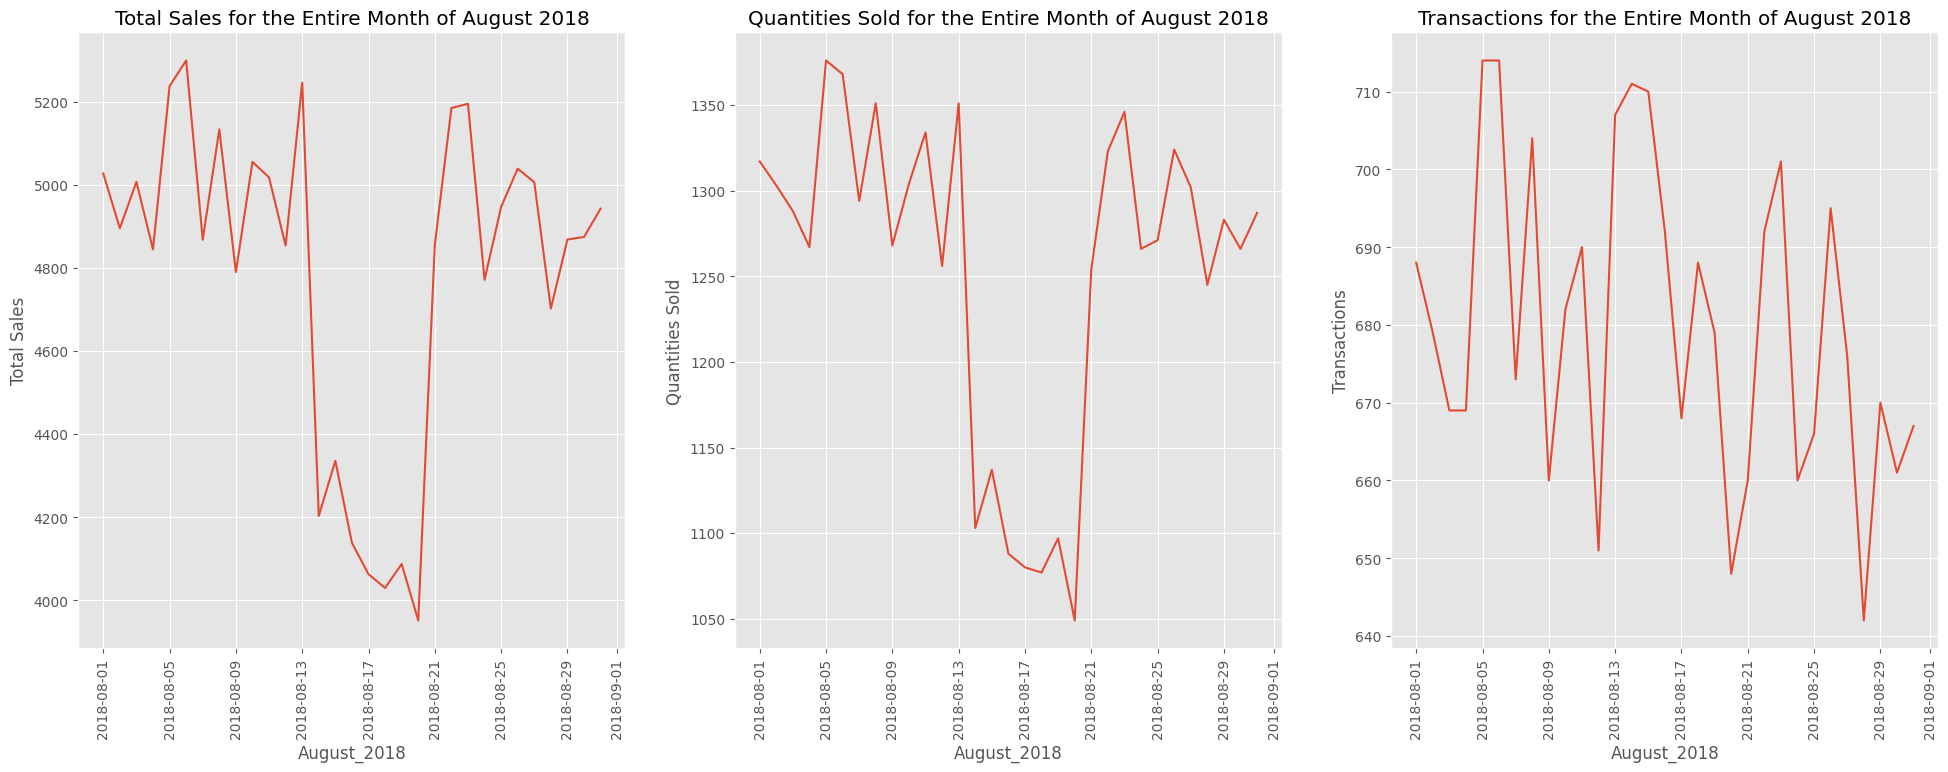

In [49]:
#plot August 2018 total_sales and May 2019

#filter August 2018
august_2018 = transactions[transactions['DATE'].isin(pd.date_range(start='2018-08-01', end='2018-08-31').tolist())]
august_2018 = august_2018.groupby('DATE').agg({'TOT_SALES':'sum','PROD_QTY':'sum','TXN_ID':'count'}).reset_index()
#visualize August 2018 total_sales 
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(24,8))
ax0.plot(august_2018['DATE'], august_2018['TOT_SALES'])
ax0.set_xlabel('August_2018')
ax0.set_ylabel('Total Sales')
ax0.set_title('Total Sales for the Entire Month of August 2018')
ax0.tick_params('x',labelrotation=90)

ax1.plot(august_2018['DATE'], august_2018['PROD_QTY'])
ax1.set_xlabel('August_2018')
ax1.set_ylabel('Quantities Sold')
ax1.set_title('Quantities Sold for the Entire Month of August 2018')
ax1.tick_params('x',labelrotation=90)

ax2.plot(august_2018['DATE'], august_2018['TXN_ID'])
ax2.set_xlabel('August_2018')
ax2.set_ylabel('Transactions')
ax2.set_title('Transactions for the Entire Month of August 2018')
ax2.tick_params('x',labelrotation=90)

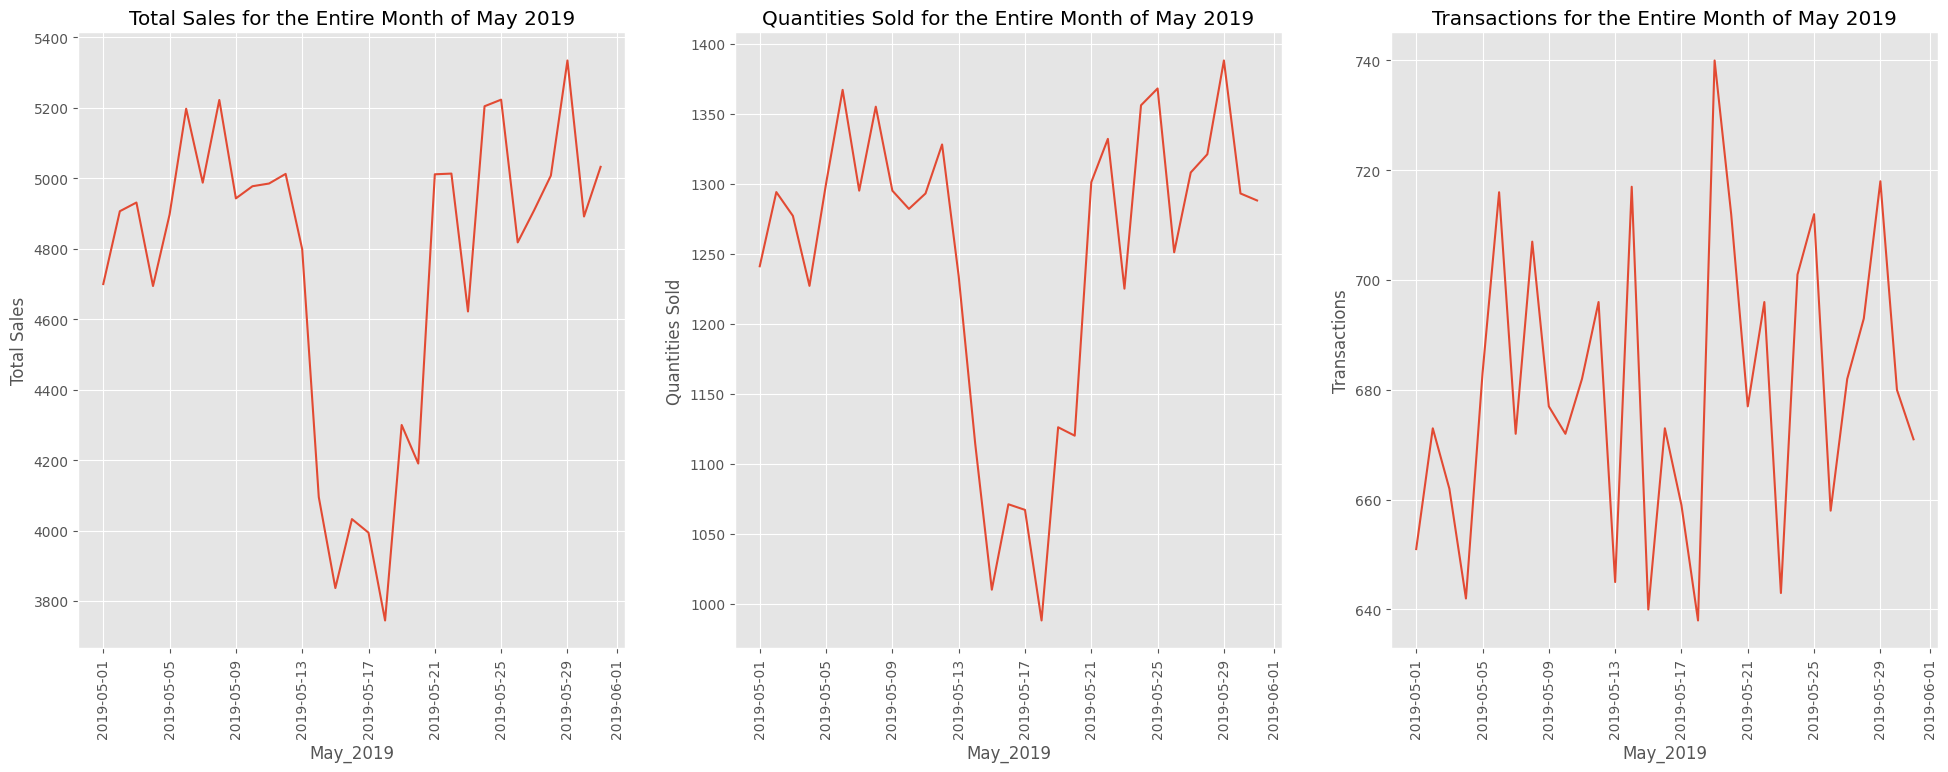

In [50]:
#filter May 2019
may_2019 = transactions[transactions['DATE'].isin(pd.date_range(start='2019-05-01', end='2019-05-31').tolist())]
may_2019 = may_2019.groupby('DATE').agg({'TOT_SALES':'sum','PROD_QTY':'sum','TXN_ID':'count'}).reset_index()
#visualize May 2019 total_sales 
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(24,8))
ax0.plot(may_2019['DATE'], may_2019['TOT_SALES'])
ax0.set_xlabel('May_2019')
ax0.set_ylabel('Total Sales')
ax0.set_title('Total Sales for the Entire Month of May 2019')
ax0.tick_params('x',labelrotation=90)

ax1.plot(may_2019['DATE'], may_2019['PROD_QTY'])
ax1.set_xlabel('May_2019')
ax1.set_ylabel('Quantities Sold')
ax1.set_title('Quantities Sold for the Entire Month of May 2019')
ax1.tick_params('x',labelrotation=90)

ax2.plot(may_2019['DATE'], may_2019['TXN_ID'])
ax2.set_xlabel('May_2019')
ax2.set_ylabel('Transactions')
ax2.set_title('Transactions for the Entire Month of May 2019')
ax2.tick_params('x',labelrotation=90)


In [51]:
totalSaleAvgByYearMonth = transactions.groupby('YearMonth')['TOT_SALES'].mean().reset_index()

plot_data = go.Bar(x=totalSaleAvgByYearMonth['YearMonth'],y=totalSaleAvgByYearMonth['TOT_SALES'])
plot_layout = go.Layout(xaxis={'type':'category'}, title='Total Sales Average Monthly')
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

## **- customers dataset**

### - Understanding the big picture

**Columns description**

There are 72.637 rows and 3 columns in dataset *`customers`*
- `LYLTY_CARD_NBR`: dtype: int - context: loyalty_card's number or ID of customer
- `LIFESTAGE`: dtype: category - context: customer attribute that identifies whether a customer has a family or not and what point in life they are at
- `PREMIUM_CUSTOMER`: dtype: category - context: customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy


In [52]:
customers.head()

LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream

In [53]:
customers.shape

(72637, 3)

In [54]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [55]:
customers.describe(include='all')

LYLTY_CARD_NBR LIFESTAGE PREMIUM_CUSTOMER
count     7.263700e+04     72637            72637
unique             NaN         7                3
top                NaN  RETIREES       Mainstream
freq               NaN     14805            29245
mean      1.361859e+05       NaN              NaN
std       8.989293e+04       NaN              NaN
min       1.000000e+03       NaN              NaN
25%       6.620200e+04       NaN              NaN
50%       1.340400e+05       NaN              NaN
75%       2.033750e+05       NaN              NaN
max       2.373711e+06       NaN              NaN

### - Preparation (Clean Data)

In [56]:
customers.duplicated().sum()

0

In [57]:
customers.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

### - Study of ralationship between variables

Text(0.5, 1.0, 'Customer Lifestage Demographics')

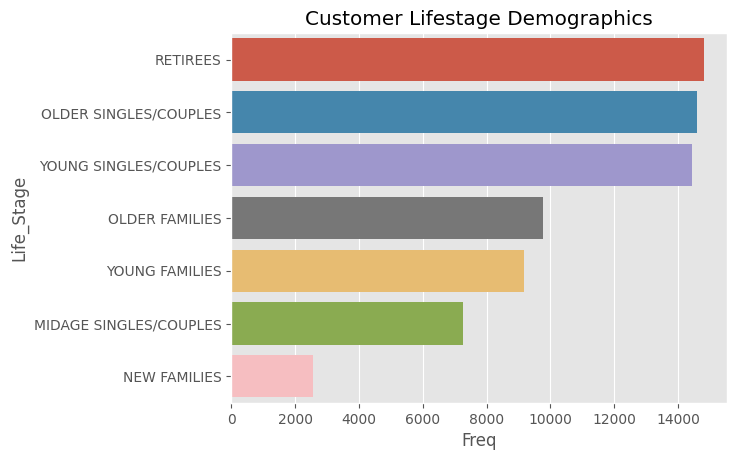

In [58]:
lifeStage = customers['LIFESTAGE'].value_counts().reset_index()
sns.barplot(data=lifeStage, x='count',y='LIFESTAGE')
plt.xlabel('Freq')
plt.ylabel('Life_Stage')
plt.title('Customer Lifestage Demographics')

=> Retirees, older and younger singles/couples are also the majority of the customer pool

Text(0.5, 1.0, 'Premium Customer')

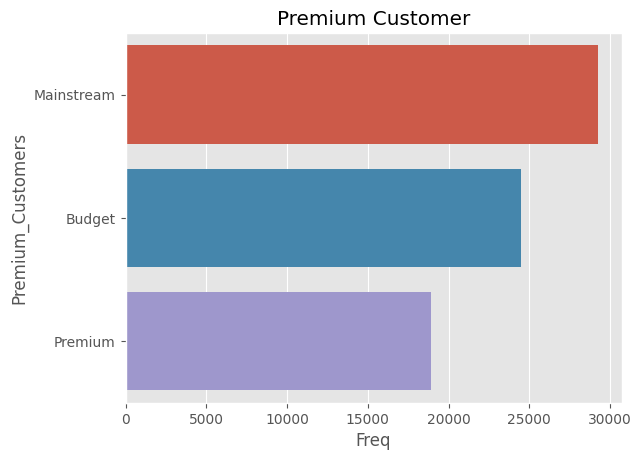

In [59]:
premium = customers['PREMIUM_CUSTOMER'].value_counts().reset_index()
sns.barplot(data=premium, x='count',y='PREMIUM_CUSTOMER')
plt.xlabel('Freq')
plt.ylabel('Premium_Customers')
plt.title('Premium Customer')

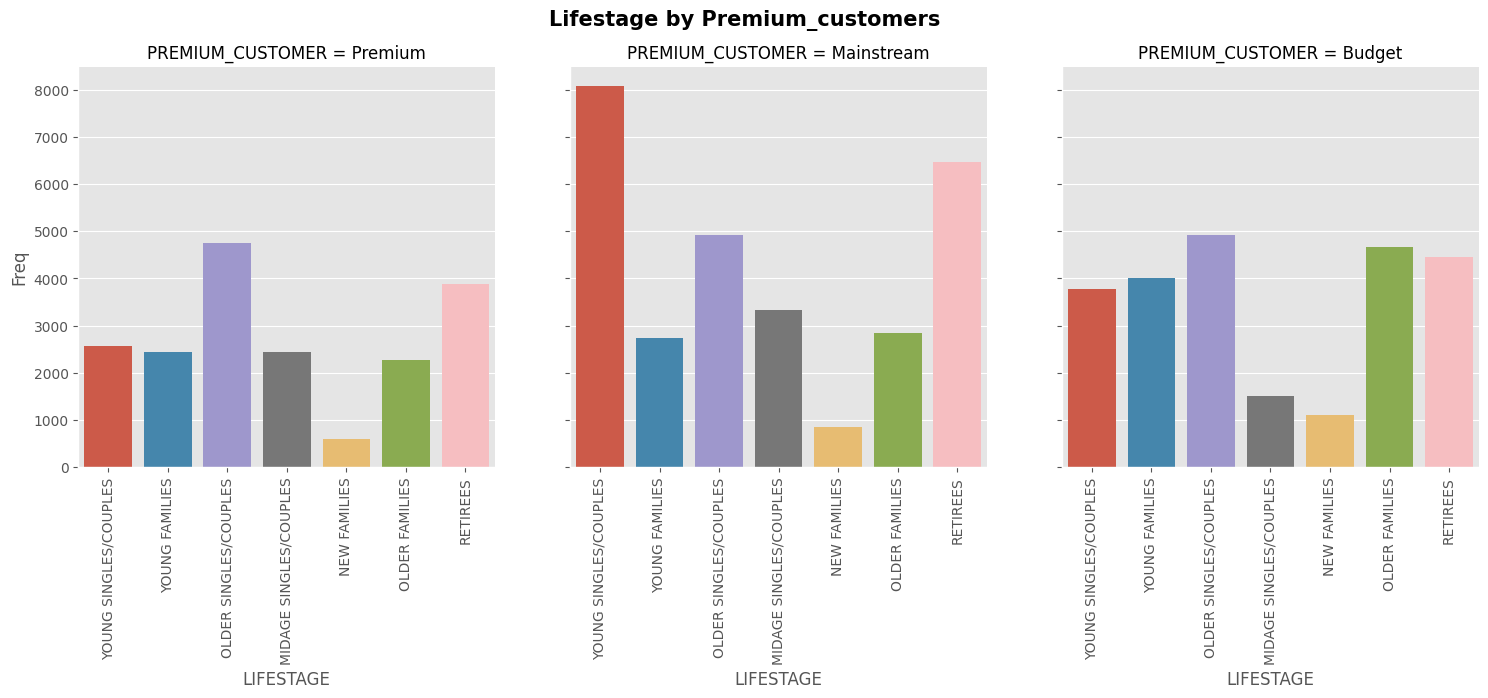

In [60]:
g = sns.catplot(data=customers, x='LIFESTAGE',col='PREMIUM_CUSTOMER', kind='count')
g.fig.suptitle('Lifestage by Premium_customers',y=1.04, fontsize=15, weight='bold')
g.set(ylabel='Freq')
g.set_xticklabels(rotation=90)

=> OLDER SINGLES/COUPLES is the most popular lifestage in Premium and Budget segments. YOUND SINGLES/COUPLES and RETIREES are the most popular lifestage in Mainstream segment

In [61]:
#merge 2 dataframe
df = transactions.merge(customers, how='inner', on='LYLTY_CARD_NBR')
df = df.sort_values('DATE', ascending=True).reset_index(drop=True)
df.head()

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR   
0 2018-07-01        169          169087  171127        91  \
1 2018-07-01        199          199028  197676        60   
2 2018-07-01        119          119264  123157        60   
3 2018-07-01        191          191099  192367       103   
4 2018-07-01        114          114009  116938        23   

                           PROD_NAME  PROD_QTY  TOT_SALES PROD_SIZE   
0                   CCs Tasty Cheese         2        4.2       175  \
1  Kettle Tortilla Chips Feta Garlic         2        9.2       150   
2  Kettle Tortilla Chips Feta Garlic         2        9.2       150   
3              RRD Steak Chimuchurri         2        5.4       150   
4                    Cheezels Cheese         2       11.4       330   

      PROD_BRAND PROD_FLAVOUR  YearMonth       LIFESTAGE PREMIUM_CUSTOMER  
0            CCs       Cheese     201807  OLDER FAMILIES           Budget  
1         Kettle       Orther     201807  YOUNG FAMILIES           Budget  
2         Kettle       Orther     201807        RETIREES           Budget  
3  Red Rock Deli       Orther     201807  YOUNG FAMILIES           Budget  
4       Cheezels       Cheese     201807  OLDER FAMILIES          Premium

In [62]:
print(df.duplicated().sum())
print(df.isna().sum().sum())

0
0


In [63]:
#df.info()
df.shape

(249667, 14)

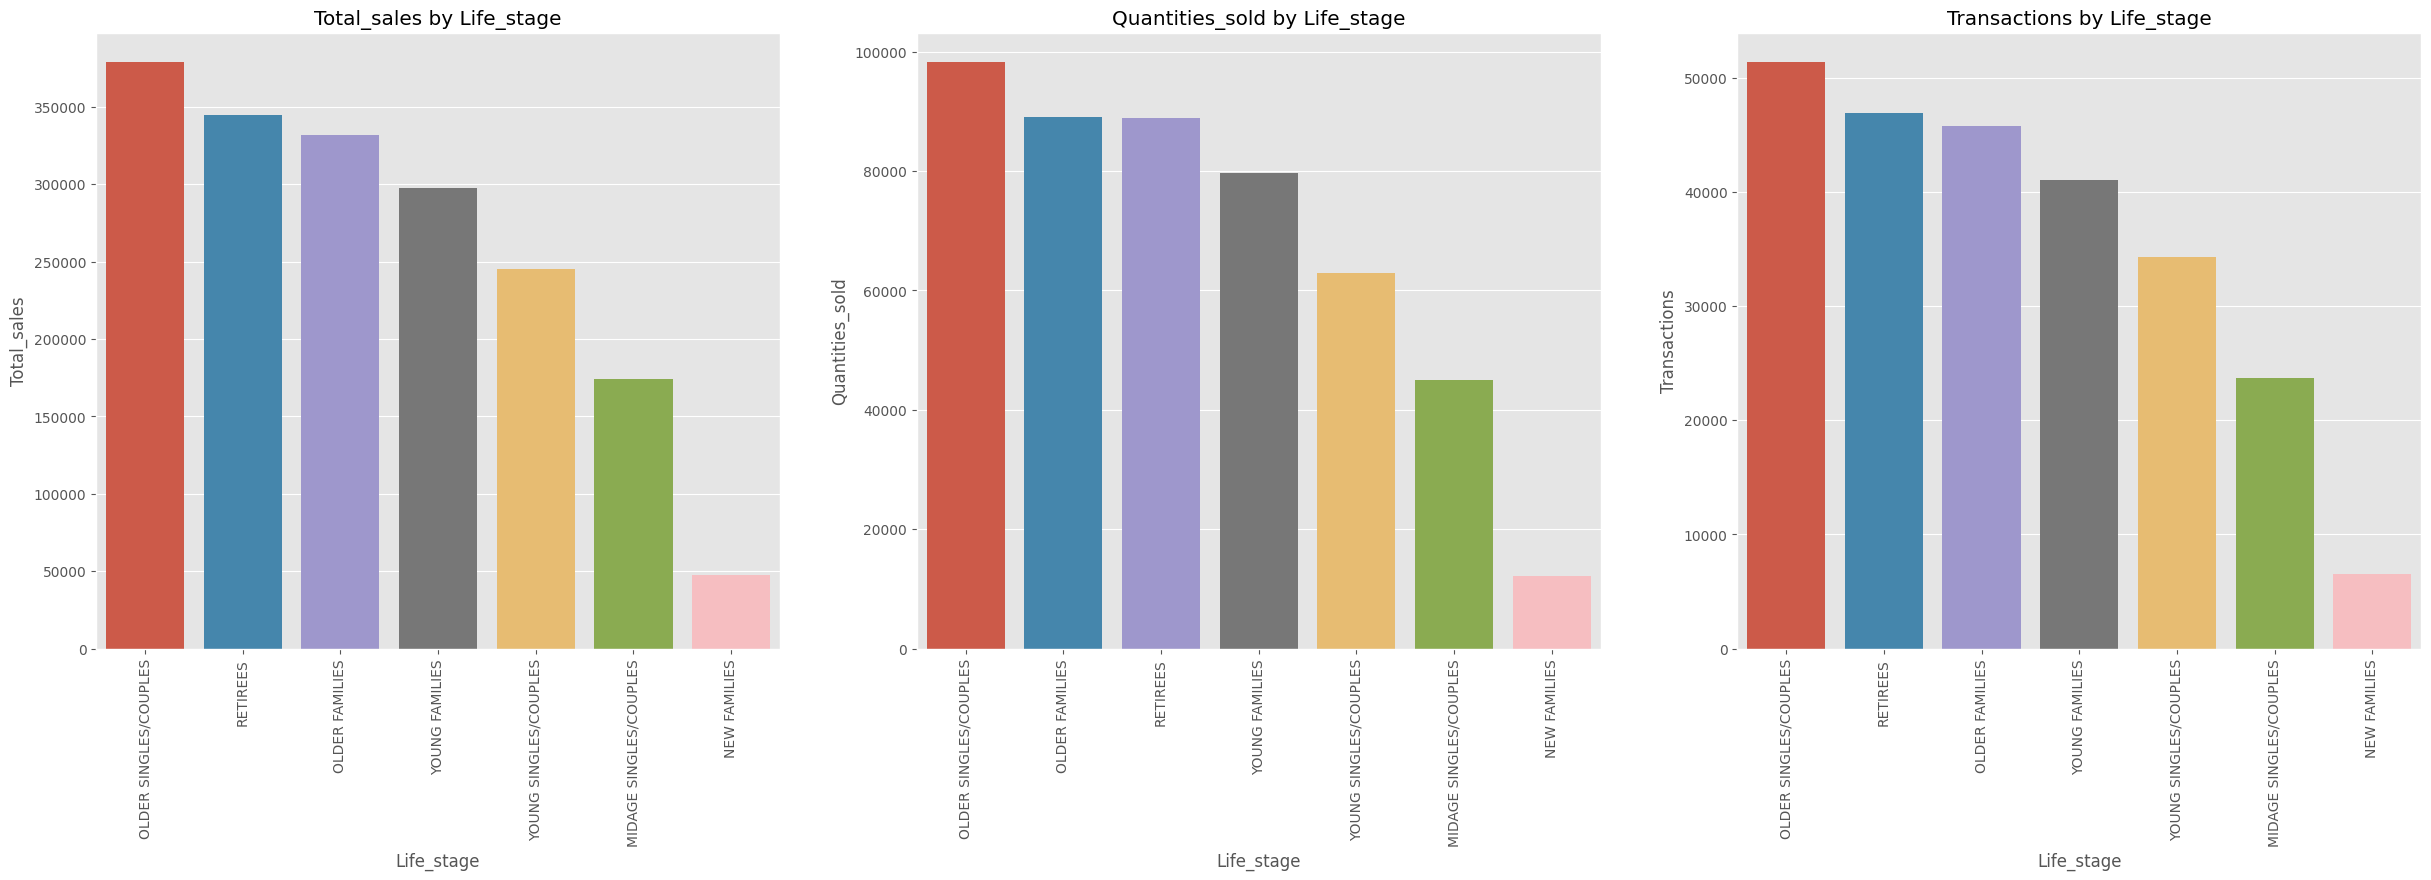

In [64]:
lifestage = df.groupby('LIFESTAGE').agg({'TOT_SALES':'sum','PROD_QTY':'sum','TXN_ID':'count'}).reset_index()
lifestage_sales = lifestage.sort_values('TOT_SALES', ascending=False).reset_index(drop=True)
lifestage_qtities = lifestage.sort_values('PROD_QTY', ascending=False).reset_index(drop=True)
lifestage_trans = lifestage.sort_values('TXN_ID', ascending=False).reset_index(drop=True)

fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(30,8))

sns.barplot(data=lifestage_sales, x='LIFESTAGE',y='TOT_SALES',ax=ax0)
ax0.set_xlabel('Life_stage')
ax0.set_ylabel('Total_sales')
ax0.set_title('Total_sales by Life_stage')
ax0.tick_params('x',labelrotation=90)

sns.barplot(data=lifestage_qtities, x='LIFESTAGE',y='PROD_QTY',ax=ax1)
ax1.set_xlabel('Life_stage')
ax1.set_ylabel('Quantities_sold')
ax1.set_title('Quantities_sold by Life_stage')
ax1.tick_params('x',labelrotation=90)

sns.barplot(data=lifestage_trans, x='LIFESTAGE',y='TXN_ID',ax=ax2)
ax2.set_xlabel('Life_stage')
ax2.set_ylabel('Transactions')
ax2.set_title('Transactions by Life_stage')
ax2.tick_params('x',labelrotation=90)

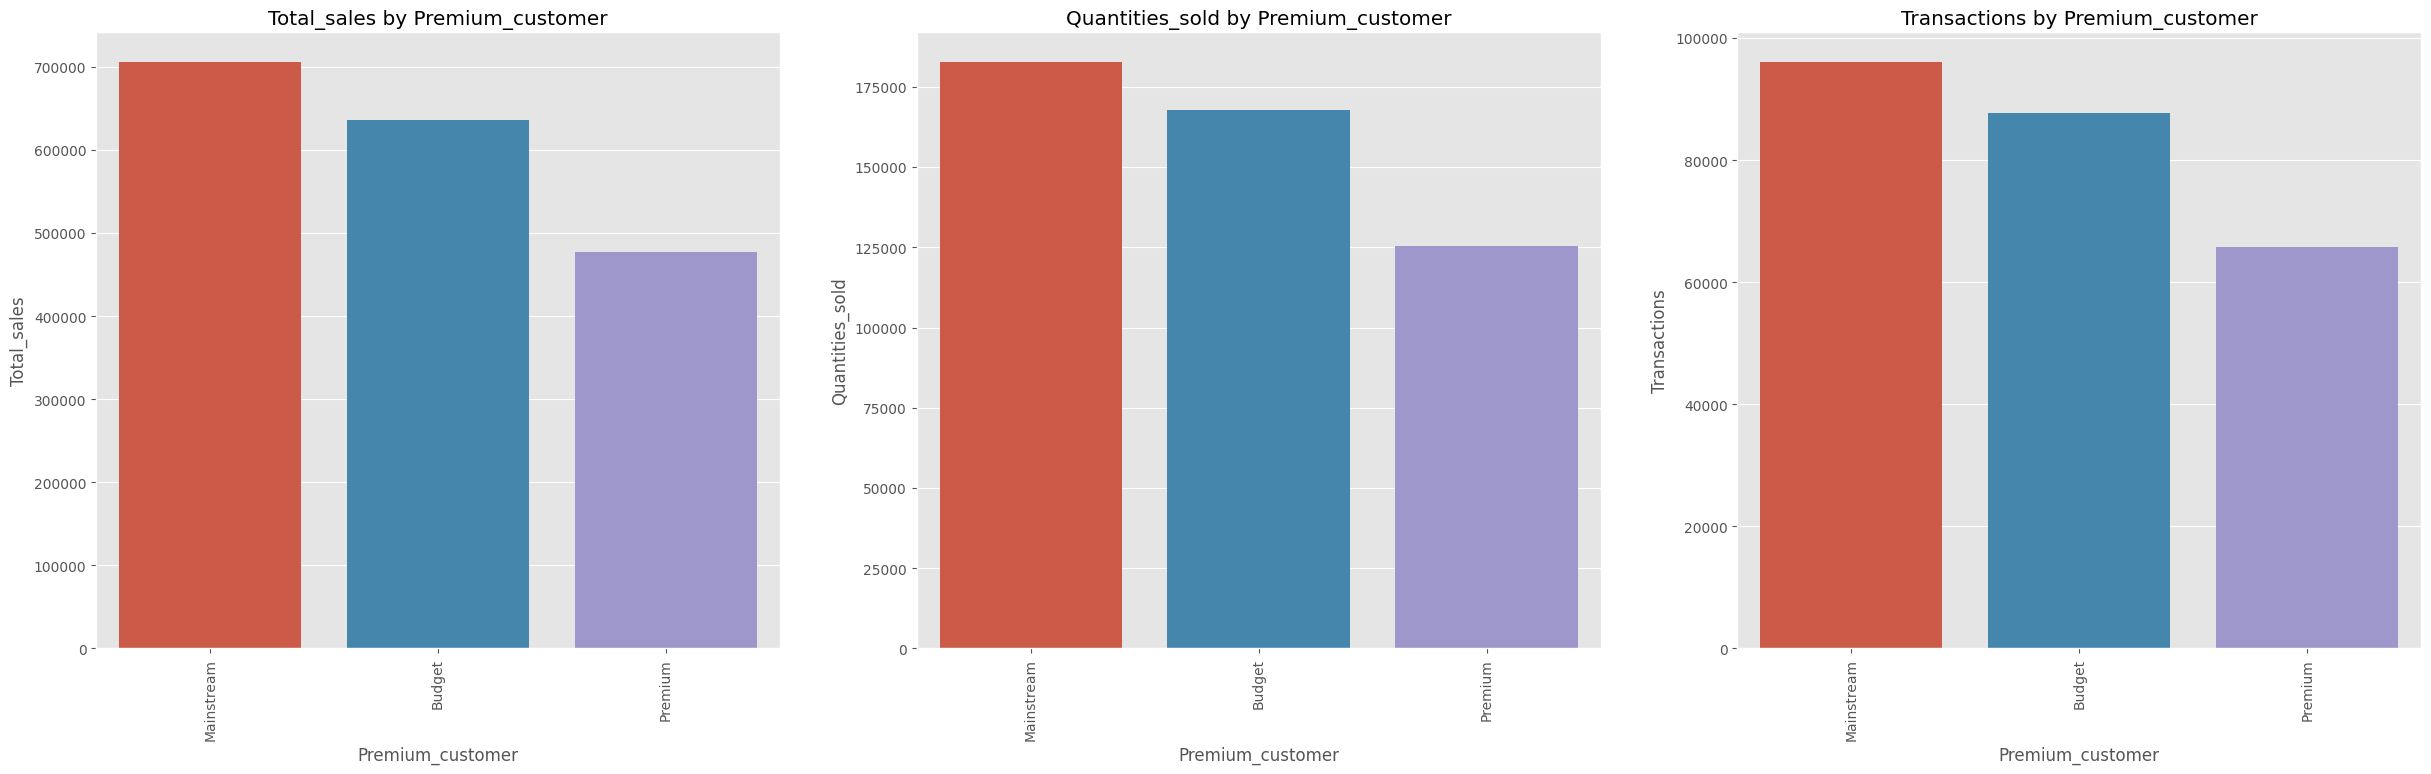

In [65]:
premium = df.groupby('PREMIUM_CUSTOMER').agg({'TOT_SALES':'sum','PROD_QTY':'sum','TXN_ID':'count'}).reset_index()
premium_sales = premium.sort_values('TOT_SALES', ascending=False).reset_index(drop=True)
premium_qtities = premium.sort_values('PROD_QTY', ascending=False).reset_index(drop=True)
premium_trans = premium.sort_values('TXN_ID', ascending=False).reset_index(drop=True)

fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(30,8))

sns.barplot(data=premium_sales, x='PREMIUM_CUSTOMER',y='TOT_SALES',ax=ax0)
ax0.set_xlabel('Premium_customer')
ax0.set_ylabel('Total_sales')
ax0.set_title('Total_sales by Premium_customer')
ax0.tick_params('x',labelrotation=90)

sns.barplot(data=premium_qtities, x='PREMIUM_CUSTOMER',y='PROD_QTY',ax=ax1)
ax1.set_xlabel('Premium_customer')
ax1.set_ylabel('Quantities_sold')
ax1.set_title('Quantities_sold by Premium_customer')
ax1.tick_params('x',labelrotation=90)

sns.barplot(data=premium_trans, x='PREMIUM_CUSTOMER',y='TXN_ID',ax=ax2)
ax2.set_xlabel('Premium_customer')
ax2.set_ylabel('Transactions')
ax2.set_title('Transactions by Premium_customer')
ax2.tick_params('x',labelrotation=90)

In [66]:
df['UNIT_PRICE'] = df['TOT_SALES'] / df['PROD_QTY']

Text(0.5, 1.0, 'No_of_customer by Life_stage and Premium')

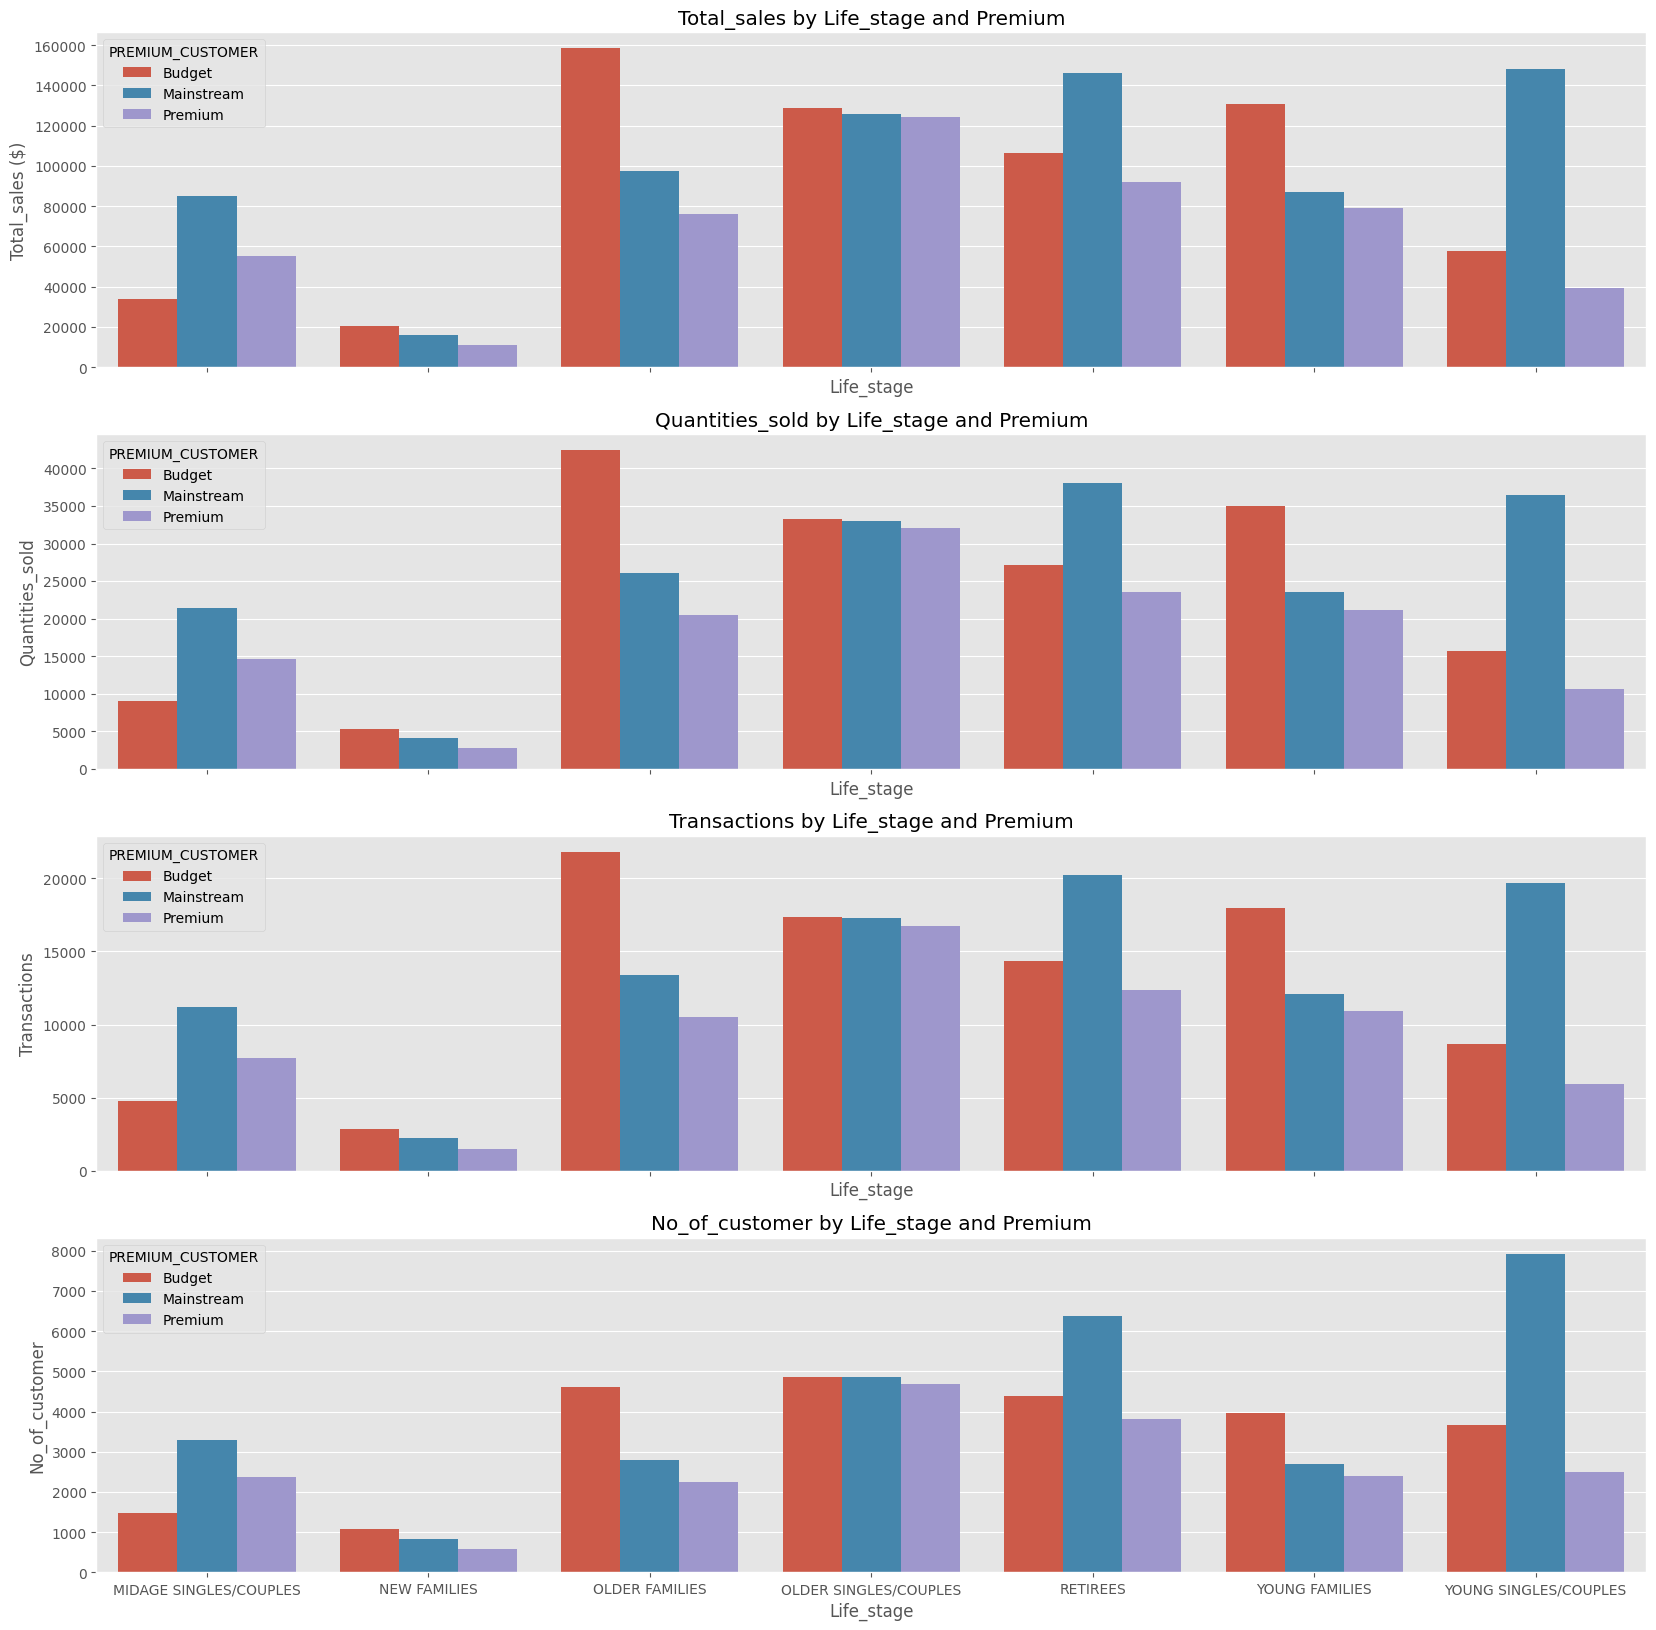

In [67]:
lifeStage_premium_sales = df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])\
    .agg({'TOT_SALES':'sum','PROD_QTY':'sum','TXN_ID':'count','LYLTY_CARD_NBR':'nunique','UNIT_PRICE':'mean'}).reset_index()
lifeStage_premium_sales['Sales_Avg_Per_Customer'] = lifeStage_premium_sales['TOT_SALES'] / lifeStage_premium_sales['LYLTY_CARD_NBR']
lifeStage_premium_sales['Sales_Avg_Per_Transaction'] = lifeStage_premium_sales['TOT_SALES'] / lifeStage_premium_sales['TXN_ID']
lifeStage_premium_sales['Qty_Avg_Per_Customer'] = lifeStage_premium_sales['PROD_QTY'] / lifeStage_premium_sales['LYLTY_CARD_NBR']
lifeStage_premium_sales['Qty_Avg_Per_Transaction'] = lifeStage_premium_sales['PROD_QTY'] / lifeStage_premium_sales['TXN_ID']

fig, (ax0,ax1,ax2,ax3) = plt.subplots(4,1,figsize=(20,20), sharex=True)

sns.barplot(data=lifeStage_premium_sales, x='LIFESTAGE',y='TOT_SALES',ax=ax0, hue='PREMIUM_CUSTOMER')
ax0.set_ylabel('Total_sales ($)')
ax0.set_xlabel('Life_stage')
ax0.set_title('Total_sales by Life_stage and Premium')

sns.barplot(data=lifeStage_premium_sales, x='LIFESTAGE',y='PROD_QTY',ax=ax1, hue='PREMIUM_CUSTOMER')
ax1.set_ylabel('Quantities_sold')
ax1.set_xlabel('Life_stage')
ax1.set_title('Quantities_sold by Life_stage and Premium')

sns.barplot(data=lifeStage_premium_sales, x='LIFESTAGE',y='TXN_ID',ax=ax2, hue='PREMIUM_CUSTOMER')
ax2.set_xlabel('Life_stage')
ax2.set_ylabel('Transactions')
ax2.set_title('Transactions by Life_stage and Premium')

sns.barplot(data=lifeStage_premium_sales, x='LIFESTAGE',y='LYLTY_CARD_NBR',ax=ax3, hue='PREMIUM_CUSTOMER')
ax3.set_xlabel('Life_stage')
ax3.set_ylabel('No_of_customer')
ax3.set_title('No_of_customer by Life_stage and Premium')

=> We can see that Budget Older Families, Mainstream Young Singles/Couples and Mainstream Retirees contribute the most chips sales, quantities sold and number of transactions. However, Budget Older Families has a lower number of customers than other two groups.

Text(0.5, 1.02, 'Sales_Avg_Per_Transaction by Life_stage and Premium')

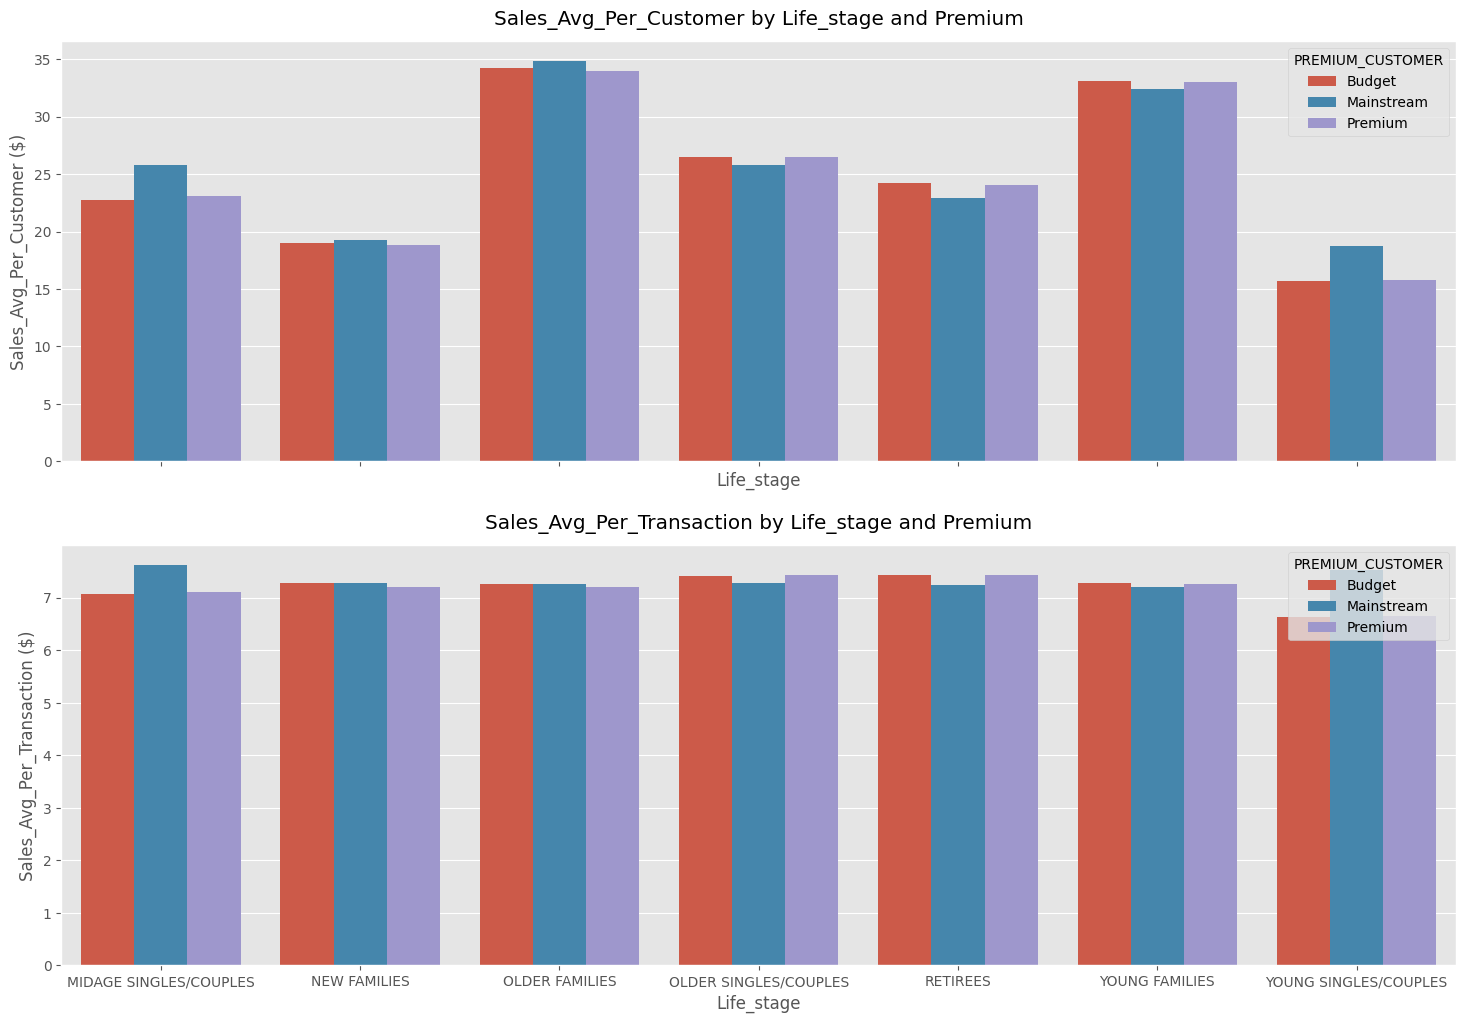

In [68]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(18,12), sharex=True)

sns.barplot(data=lifeStage_premium_sales, x='LIFESTAGE',y='Sales_Avg_Per_Customer',ax=ax0, hue='PREMIUM_CUSTOMER')
ax0.set_ylabel('Sales_Avg_Per_Customer ($)')
ax0.set_xlabel('Life_stage')
ax0.set_title('Sales_Avg_Per_Customer by Life_stage and Premium',y=1.02)

sns.barplot(data=lifeStage_premium_sales, x='LIFESTAGE',y='Sales_Avg_Per_Transaction',ax=ax1, hue='PREMIUM_CUSTOMER')
ax1.set_ylabel('Sales_Avg_Per_Transaction ($)')
ax1.set_xlabel('Life_stage')
ax1.set_title('Sales_Avg_Per_Transaction by Life_stage and Premium',y=1.02)

=> It seem that, Older Families and Young Families pay the most for chips in the given year. Both Sales_Avg_Per_Customer and Sales_Avg_Per_Transaction of this groups are very high.

Text(0.5, 1.02, 'Qty_Avg_Per_Transaction by Life_stage and Premium')

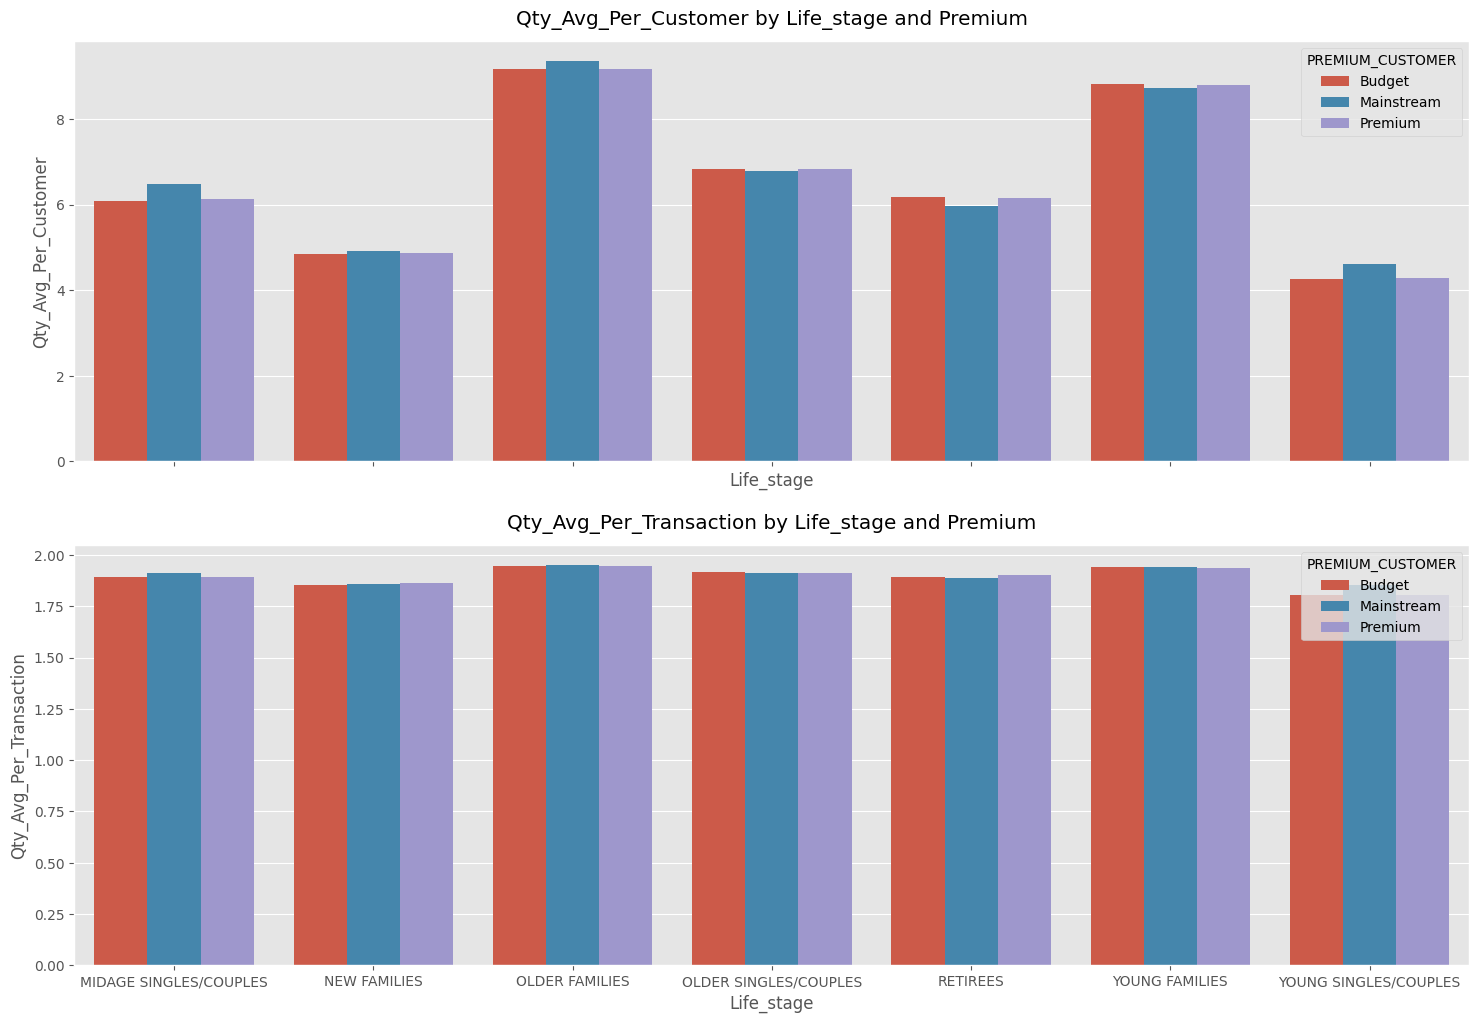

In [69]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(18,12), sharex=True)

sns.barplot(data=lifeStage_premium_sales, x='LIFESTAGE',y='Qty_Avg_Per_Customer',ax=ax0, hue='PREMIUM_CUSTOMER')
ax0.set_ylabel('Qty_Avg_Per_Customer')
ax0.set_xlabel('Life_stage')
ax0.set_title('Qty_Avg_Per_Customer by Life_stage and Premium',y=1.02)

sns.barplot(data=lifeStage_premium_sales, x='LIFESTAGE',y='Qty_Avg_Per_Transaction',ax=ax1, hue='PREMIUM_CUSTOMER')
ax1.set_ylabel('Qty_Avg_Per_Transaction')
ax1.set_xlabel('Life_stage')
ax1.set_title('Qty_Avg_Per_Transaction by Life_stage and Premium',y=1.02)

=> When we look at quantities sold, the same pattern appears. Older Families and Young Families purchase the most chips in the given year. Both Qty_Avg_Per_Customer and Qty_Avg_Per_Transaction of this two groups are highest.

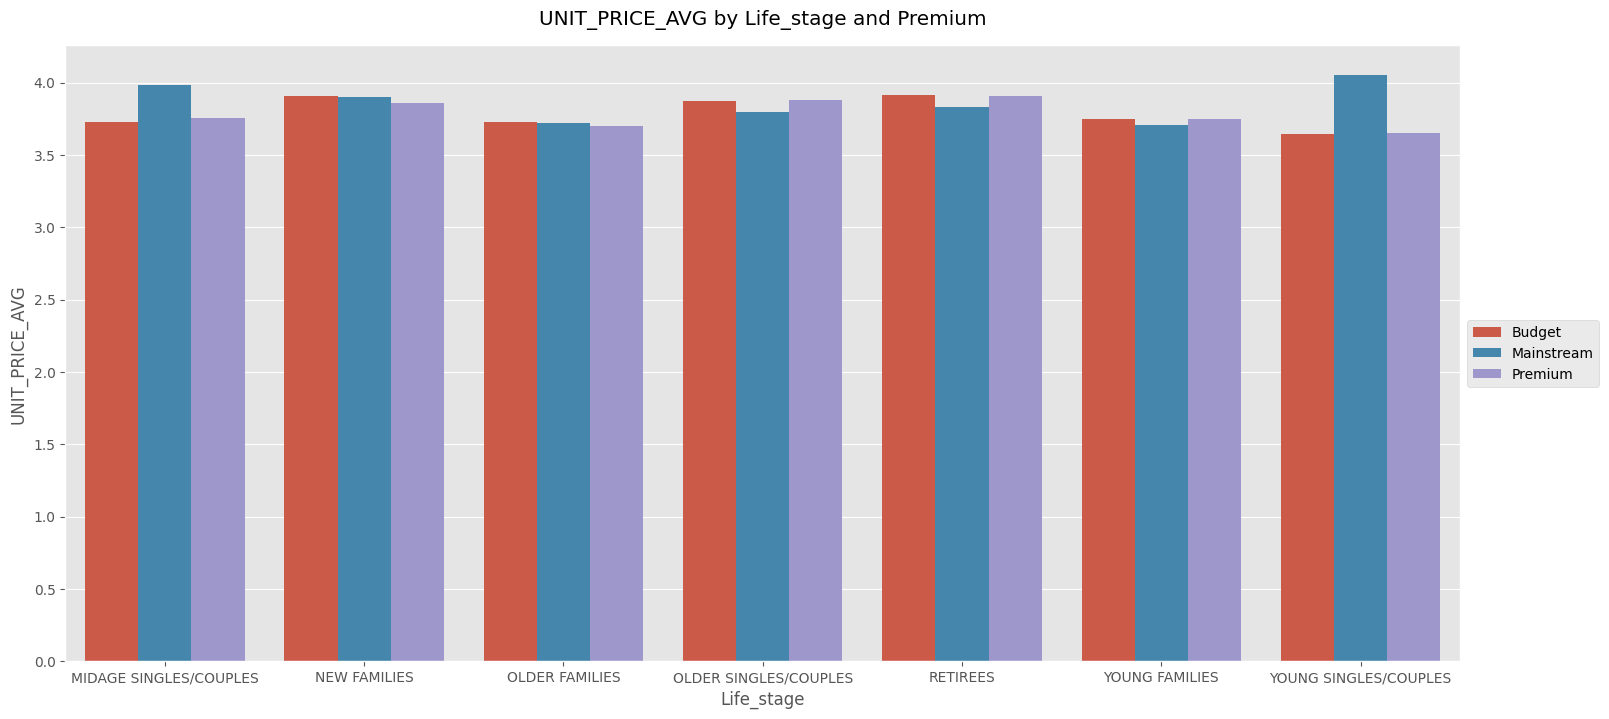

In [70]:

fig, ax = plt.subplots(figsize=(18,8))
sns.barplot(data=lifeStage_premium_sales, x='LIFESTAGE',y='UNIT_PRICE',ax=ax, hue='PREMIUM_CUSTOMER')
ax.set_ylabel('UNIT_PRICE_AVG')
ax.set_xlabel('Life_stage')
ax.set_title('UNIT_PRICE_AVG by Life_stage and Premium',y=1.02)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

=> Look at the chart, we can see Mainstream Midage and Mainstream Young Singles/Couples are more willing to pay per packet of chips compare to their Budget and Premium couterparts. This may due to Premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer Premium Midage and Young Singles/Couples buying chips compared to their Mainstream couterparts.

In [71]:
#As the difference in average price per unit isn’t large,
#we can check if this difference is statistically different.

#Test: UNIT_PRICE average of Mainstream Young and Midage Singles/Couples is statistically different
#with UNIT_PRICE average of Budget and Premium Young and Midage Singles/Couples

mainstream_data = df[(df['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES','MIDAGE SINGLES/COUPLES']))&(df['PREMIUM_CUSTOMER']=='Mainstream')]
non_mainstream_data = df[(df['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES','MIDAGE SINGLES/COUPLES']))&(df['PREMIUM_CUSTOMER']!='Mainstream')]

In [72]:
mainstream_data.shape

(30905, 15)

In [73]:
non_mainstream_data.shape

(27104, 15)

In [74]:
#Compare the means of two different independent sample
#=> We can apply Two-sample t-test if two-sample have the same variance, if not we can apply Welch's t-test

#t-test assumptions:
#1.Normality: The data of each sample must be normally distributed
#2.Independence: The observations within each group must be independent of each other (Two samples are independent)
#3.Homogeneity of variance: The variance of the data within each sample should be equal

#1. Normality test
#mainstream_data: sample size n is 30905, that is large enough then normality may be not concern due to Central Limit Theorem
#non_mainstream_data: sample size n is 27104, that is large enough then normality may be not concern due to Central Limit Theorem

#2. Samples are independent - Correlations Test

#3.homogeneity of variance test
import scipy.stats as stats
data1=mainstream_data['UNIT_PRICE']
data2=non_mainstream_data['UNIT_PRICE']
stat,p = stats.levene(data1, data2)
print(stat, p)

163.9221228536878 1.7684190417254812e-37


In [75]:
#p-val < 0.05 => The variance of the data within each sample should be not equal
#Using Welch's t-test
#Hypotheses:
#H0: UNIT_PRICE average of Mainstream Young and Midage Singles/Couples is THE SAME
#with UNIT_PRICE average of Budget and Premium Young and Midage Singles/Couples
#HA: UNIT_PRICE average of Mainstream Young and Midage Singles/Couples is GREATER
#with UNIT_PRICE average of Budget and Premium Young and Midage Singles/Couples

from pingouin import ttest
results1 = ttest(data1,data2,alternative='greater')
results1

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\pingouin\bayesian.py:152: RuntimeWarning:

overflow encountered in scalar divide



T           dof alternative  p-val        CI95%  cohen-d BF10   
T-test  38.110388  55617.712576     greater    0.0  [0.32, inf]  0.31874  inf  \

        power  
T-test    1.0

=> The t-test results has p-val < 0.05, i.e the UNIT_PRICE for Maintream Young and Midage Singles/Couples are significantly higher than that of Budget or Premium Young and Midage Singles/Couples

=> To conclude, given that the Mainstream Young Singles/Couples contributed to the most sales, have the largest number of customers. This group has highest price_unit_avg but tend to purchase lower quantities chips, perhaps this group can be further targeted for more advertisements/recommendations/promotions on certain brands to encourage more purchase and for purchasing slightly more expensive chips brands.

=> Mainstream Retirees tend to be the same as Mainstream Young Singles/Couples, except that they tend to purchase more chips and slightly cheaper chips. The general strategy would be the same except to promote cheaper brands to them.

=> Meanwhile, Budget Older Families also contributed to the most sales, and they tend to buy lots of chips, but there are not as much of them in the customer base. Therefore, the strategy would be to attract more of this segment to increase the pool size

In [76]:
#Market Basket Analysis - Mainstream Young Singles/Couples
a = df[(df['LIFESTAGE']=='YOUNG SINGLES/COUPLES')&(df['PREMIUM_CUSTOMER']=='Mainstream')]
b = a.groupby(['TXN_ID','PROD_BRAND'])['PROD_NAME'].count().unstack().reset_index().fillna(0).set_index('TXN_ID')

def encode_units(x):
    if x <= 0:
        return 0
    else:
        return 1
    
b = b.applymap(encode_units)
b

PROD_BRAND  Burger Rings  CCs  Cheetos  Cheezels  Cobs  Doritos  French Fries   
TXN_ID                                                                          
2                      0    0        0         0     0        0             0  \
10                     0    0        0         0     0        1             0   
22                     0    0        0         0     0        0             0   
23                     0    0        0         0     0        0             0   
24                     0    0        0         0     0        0             0   
...                  ...  ...      ...       ...   ...      ...           ...   
270186                 0    0        0         0     1        0             0   
270200                 0    0        0         0     0        0             0   
270201                 0    0        0         0     0        0             0   
270202                 0    0        0         0     0        0             0   
270205                 0    0        0         0     0        0             0   

PROD_BRAND  Grain Waves  Infuzions  Kettle  Natural Chip Co  Pringles   
TXN_ID                                                                  
2                     0          0       0                0         0  \
10                    0          0       0                0         0   
22                    0          0       1                0         0   
23                    0          0       0                0         0   
24                    0          1       0                0         0   
...                 ...        ...     ...              ...       ...   
270186                0          0       0                0         0   
270200                0          0       1                0         0   
270201                0          0       0                0         1   
270202                0          0       0                0         1   
270205                0          0       1                0         0   

PROD_BRAND  Red Rock Deli  Smiths  Sunbites  Thins  Tostitos  Twisties   
TXN_ID                                                                   
2                       1       0         0      0         0         0  \
10                      0       0         0      0         0         0   
22                      0       0         0      0         0         0   
23                      1       0         0      0         0         0   
24                      0       0         0      0         0         0   
...                   ...     ...       ...    ...       ...       ...   
270186                  0       0         0      0         0         0   
270200                  0       0         0      0         0         0   
270201                  0       0         0      0         0         0   
270202                  0       0         0      0         0         0   
270205                  0       0         0      0         0         0   

PROD_BRAND  Tyrrells  Woolworth  
TXN_ID                           
2                  0          0  
10                 0          0  
22                 0          0  
23                 0          0  
24                 0          0  
...              ...        ...  
270186             0          0  
270200             0          0  
270201             0          0  
270202             0          0  
270205             0          0  

[19642 rows x 20 columns]

In [77]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

association_rules1 = apriori(b, min_support=0.0001,use_colnames=True)
association_rules1

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



support                 itemsets
0   0.003157           (Burger Rings)
1   0.011302                    (CCs)
2   0.008451                (Cheetos)
3   0.017615               (Cheezels)
4   0.043987                   (Cobs)
5   0.121067                (Doritos)
6   0.003971           (French Fries)
7   0.032889            (Grain Waves)
8   0.063588              (Infuzions)
9   0.195703                 (Kettle)
10  0.020059        (Natural Chip Co)
11  0.117860               (Pringles)
12  0.049333          (Red Rock Deli)
13  0.101161                 (Smiths)
14  0.006517               (Sunbites)
15  0.059363                  (Thins)
16  0.045311               (Tostitos)
17  0.045820               (Twisties)
18  0.031514               (Tyrrells)
19  0.024387              (Woolworth)
20  0.000102           (Kettle, Cobs)
21  0.000102           (Cobs, Smiths)
22  0.000204      (Doritos, Pringles)
23  0.000102        (Doritos, Smiths)
24  0.000153      (Doritos, Twisties)
25  0.000102     (Grain Waves, Thins)
26  0.000102      (Kettle, Infuzions)
27  0.000102       (Kettle, Pringles)
28  0.000153  (Red Rock Deli, Kettle)
29  0.000102         (Kettle, Smiths)
30  0.000102       (Kettle, Tostitos)
31  0.000102        (Thins, Pringles)
32  0.000102  (Red Rock Deli, Smiths)
33  0.000102      (Woolworth, Smiths)

In [78]:
rules = association_rules(association_rules1, metric="confidence",min_threshold=0.001)
rules

antecedents      consequents  antecedent support  consequent support   
0            (Cobs)         (Kettle)            0.043987            0.195703  \
1            (Cobs)         (Smiths)            0.043987            0.101161   
2          (Smiths)           (Cobs)            0.101161            0.043987   
3         (Doritos)       (Pringles)            0.121067            0.117860   
4        (Pringles)        (Doritos)            0.117860            0.121067   
5          (Smiths)        (Doritos)            0.101161            0.121067   
6         (Doritos)       (Twisties)            0.121067            0.045820   
7        (Twisties)        (Doritos)            0.045820            0.121067   
8     (Grain Waves)          (Thins)            0.032889            0.059363   
9           (Thins)    (Grain Waves)            0.059363            0.032889   
10      (Infuzions)         (Kettle)            0.063588            0.195703   
11  (Red Rock Deli)         (Kettle)            0.049333            0.195703   
12         (Smiths)         (Kettle)            0.101161            0.195703   
13       (Tostitos)         (Kettle)            0.045311            0.195703   
14          (Thins)       (Pringles)            0.059363            0.117860   
15  (Red Rock Deli)         (Smiths)            0.049333            0.101161   
16         (Smiths)  (Red Rock Deli)            0.101161            0.049333   
17      (Woolworth)         (Smiths)            0.024387            0.101161   
18         (Smiths)      (Woolworth)            0.101161            0.024387   

     support  confidence      lift  leverage  conviction  zhangs_metric  
0   0.000102    0.002315  0.011828 -0.008507    0.806163      -0.988686  
1   0.000102    0.002315  0.022883 -0.004348    0.900925      -0.978102  
2   0.000102    0.001007  0.022883 -0.004348    0.956976      -0.979385  
3   0.000204    0.001682  0.014272 -0.014065    0.883627      -0.987434  
4   0.000204    0.001728  0.014272 -0.014065    0.880454      -0.987389  
5   0.000102    0.001007  0.008314 -0.012145    0.879818      -0.992521  
6   0.000153    0.001262  0.027533 -0.005395    0.955385      -0.975719  
7   0.000153    0.003333  0.027533 -0.005395    0.881872      -0.973695  
8   0.000102    0.003096  0.052154 -0.001851    0.943559      -0.949475  
9   0.000102    0.001715  0.052154 -0.001851    0.968773      -0.950790  
10  0.000102    0.001601  0.008182 -0.012343    0.805587      -0.992334  
11  0.000153    0.003096  0.015820 -0.009502    0.806795      -0.984949  
12  0.000102    0.001007  0.005143 -0.019696    0.805107      -0.995375  
13  0.000102    0.002247  0.011483 -0.008766    0.806108      -0.989032  
14  0.000102    0.001715  0.014553 -0.006895    0.883656      -0.986299  
15  0.000102    0.002064  0.020403 -0.004889    0.900698      -0.980584  
16  0.000102    0.001007  0.020403 -0.004889    0.951625      -0.981623  
17  0.000102    0.004175  0.041275 -0.002365    0.902608      -0.959691  
18  0.000102    0.001007  0.041275 -0.002365    0.976596      -0.962745

=> Since the orders mainly buy one product, using Market Basket Analysis is not effective in this case.

In [79]:
#Affinity score to Brand
young_mainstream = df[(df['LIFESTAGE']=='YOUNG SINGLES/COUPLES')&(df['PREMIUM_CUSTOMER']=='Mainstream')]
qty_brand = young_mainstream.groupby('PROD_BRAND')['PROD_QTY'].sum().reset_index()
qty_brand['PROD_QTY'] = qty_brand['PROD_QTY'] / young_mainstream['PROD_QTY'].sum()
qty_brand = qty_brand.rename(columns={'PROD_QTY':'Targeted_segment'})

orther_segment =  df[~((df['LIFESTAGE']=='YOUNG SINGLES/COUPLES')&(df['PREMIUM_CUSTOMER']=='Mainstream'))]
qty_brand_other = orther_segment.groupby('PROD_BRAND')['PROD_QTY'].sum().reset_index()
qty_brand_other['PROD_QTY'] = qty_brand_other['PROD_QTY'] / orther_segment['PROD_QTY'].sum()
qty_brand_other = qty_brand_other.rename(columns={'PROD_QTY':'Other_segments'})

qty_brand_affinity = qty_brand.merge(qty_brand_other,on='PROD_BRAND')
qty_brand_affinity['Affinity_to_brand'] = qty_brand_affinity['Targeted_segment'] / qty_brand_affinity['Other_segments']
qty_brand_affinity = qty_brand_affinity.sort_values('Affinity_to_brand',ascending=False).reset_index(drop=True)
qty_brand_affinity

PROD_BRAND  Targeted_segment  Other_segments  Affinity_to_brand
0          Tyrrells          0.031307        0.025387           1.233209
1          Twisties          0.045824        0.037426           1.224397
2           Doritos          0.121806        0.099873           1.219610
3            Kettle          0.196445        0.163584           1.200877
4          Tostitos          0.045057        0.037526           1.200692
5          Pringles          0.118491        0.099438           1.191612
6              Cobs          0.044290        0.038584           1.147884
7         Infuzions          0.064176        0.056386           1.138154
8             Thins          0.059903        0.056309           1.063835
9       Grain Waves          0.032458        0.030817           1.053241
10         Cheezels          0.017831        0.018425           0.967767
11           Smiths          0.098852        0.129103           0.765684
12     French Fries          0.003917        0.005690           0.688424
13          Cheetos          0.007971        0.011923           0.668505
14    Red Rock Deli          0.048016        0.072583           0.661526
15  Natural Chip Co          0.019447        0.030487           0.637886
16              CCs          0.011093        0.018671           0.594141
17         Sunbites          0.006300        0.012431           0.506800
18        Woolworth          0.023912        0.048839           0.489604
19     Burger Rings          0.002903        0.006518           0.445444

We can see that:
- Mainstream Young Singles/Couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population.
- Mainstream Young Singles/Couples are 56% less likely to purchase Burger Rings compared to the rest
of the population

In [80]:
#Affinity score to Pack size
young_mainstream1 = df[(df['LIFESTAGE']=='YOUNG SINGLES/COUPLES')&(df['PREMIUM_CUSTOMER']=='Mainstream')]
qty_size = young_mainstream1.groupby('PROD_SIZE')['PROD_QTY'].sum().reset_index()
qty_size['PROD_QTY'] = qty_size['PROD_QTY'] / young_mainstream1['PROD_QTY'].sum()
qty_size = qty_size.rename(columns={'PROD_QTY':'Targeted_segment'})

orther_segment1 =  df[~((df['LIFESTAGE']=='YOUNG SINGLES/COUPLES')&(df['PREMIUM_CUSTOMER']=='Mainstream'))]
qty_size_other = orther_segment1.groupby('PROD_SIZE')['PROD_QTY'].sum().reset_index()
qty_size_other['PROD_QTY'] = qty_size_other['PROD_QTY'] / orther_segment1['PROD_QTY'].sum()
qty_size_other = qty_size_other.rename(columns={'PROD_QTY':'Other_segments'})

qty_size_affinity = qty_size.merge(qty_size_other,on='PROD_SIZE')
qty_size_affinity['Affinity_to_size'] = qty_size_affinity['Targeted_segment'] / qty_size_affinity['Other_segments']
qty_size_affinity = qty_size_affinity.sort_values('Affinity_to_size',ascending=False).reset_index(drop=True)
qty_size_affinity

PROD_SIZE  Targeted_segment  Other_segments  Affinity_to_size
0        270          0.031581        0.024797          1.273569
1        380          0.031910        0.025280          1.262264
2        330          0.060807        0.049565          1.226804
3        134          0.118491        0.099438          1.191612
4        110          0.105453        0.088723          1.188566
5        210          0.028897        0.024822          1.164145
6        135          0.014654        0.012920          1.134214
7        250          0.014243        0.012629          1.127843
8        170          0.080145        0.080023          1.001523
9        175          0.253006        0.266791          0.948330
10       150          0.164151        0.173375          0.946799
11       165          0.055219        0.061527          0.897479
12       190          0.007423        0.012294          0.603775
13       180          0.003561        0.005995          0.594002
14       160          0.006355        0.012226          0.519771
15        90          0.006300        0.012431          0.506800
16       125          0.002986        0.005965          0.500518
17       200          0.008902        0.018434          0.482901
18        70          0.003013        0.006247          0.482292
19       220          0.002903        0.006518          0.445444

=> It looks like Mainstream Young Singles/Couples are 27% more likely to purchase a 270g pack of chips compared to the rest of the population.

In [81]:
df.query("PROD_SIZE == '270'")['PROD_NAME'].unique()

array(['Twisties Chicken', 'Twisties Cheese'], dtype=object)

=> Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of purchasing Twisties

**`Conclusions`**:

- EDA showed that Kettle and Smiths brand of chips brought in the largest revenue as well as quantities sold
- Products with Salt and Sour Cream tend to sell the most
- Mainstream Young Singles/Couples contributed to one of the highest sales due to their large customer pool but tend to purchase lower quantity of chips, so advertistments/recommendations/promotions can be targeted towards this group to encourage more purchase
- Mainstream Retirees tend to be the same as Mainstream Young Singles/Couples, except that they tend to purchase more chips and slightly cheaper chips. The general strategy would be the same except to promote cheaper brands to them.
- Budget Older Families also contributed to the most sales, and they tend to buy lots of chips, but there are not as much of them in the customer base. Therefore, the strategy would be to attract more of this segment to increase the pool size.
- Market basket analysis did not provide any meaningful support/relationship among brands from Mainstream Young Singles/Couples customer purchase behavior.
- Affinity analysis suggests that Mainstream Young Singles/Couples have affinity towards Tyrrells brand and 270g product size
